In [1]:
import pandas as pd

d:\py\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
d:\py\Anaconda3\lib\site-packages\pandas\core\arrays\masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
df=pd.read_excel('食品饮料2024area.xlsx')
df

symbol shortname  year  week_of_year  week_start_day  sum_amount  \
0         596       古井贡  2021            53        20201228    34581.40   
1         596       古井贡  2021             1        20210104    25028.50   
2         596       古井贡  2021             2        20210111    52532.01   
3         596       古井贡  2021             3        20210118    51177.83   
4         596       古井贡  2021             4        20210125    50524.99   
...       ...       ...   ...           ...             ...         ...   
16444  605179      一鸣食品  2023            49        20231204    13336.00   
16445  605179      一鸣食品  2023            50        20231211    19607.70   
16446  605179      一鸣食品  2023            51        20231218    13707.50   
16447  605179      一鸣食品  2023            52        20231225    13734.90   
16448  605179      一鸣食品  2024             1        20240101    14327.10   

       sum_quantity  sum_bill  
0               188       107  
1               236       137  
2               301       130  
3               338       132  
4               343       200  
...             ...       ...  
16444           692       618  
16445           908       696  
16446           765       652  
16447           793       688  
16448           827       713  

[16449 rows x 8 columns]

In [3]:
df.columns

Index(['symbol', 'shortname', 'year', 'week_of_year', 'week_start_day',
       'sum_amount', 'sum_quantity', 'sum_bill'],
      dtype='object')

# 以周为单位聚合

In [4]:
data=df.groupby(['symbol', 'week_start_day']).agg({
    'shortname': 'first',
    'week_of_year': 'first',
    'sum_amount': 'sum',
    'sum_quantity': 'sum',
    'sum_bill': 'sum'
}).reset_index().sort_values(by=['symbol', 'week_start_day'], ascending=True)
data['week_start_day'] = pd.to_datetime(data['week_start_day'], format='%Y%m%d')
data

symbol week_start_day shortname  week_of_year  sum_amount  \
0         568     2020-12-28      泸州老窖            53    17915.00   
1         568     2021-01-04      泸州老窖             1   127278.00   
2         568     2021-01-11      泸州老窖             2    22462.00   
3         568     2021-01-18      泸州老窖             3   129942.00   
4         568     2021-01-25      泸州老窖             4    80747.00   
...       ...            ...       ...           ...         ...   
16244  605567     2023-12-04      春雪食品            49     5579.99   
16245  605567     2023-12-11      春雪食品            50     7151.02   
16246  605567     2023-12-18      春雪食品            51    14751.70   
16247  605567     2023-12-25      春雪食品            52    16598.87   
16248  605567     2024-01-01      春雪食品             1    19604.36   

       sum_quantity  sum_bill  
0                19         6  
1               130        23  
2                24        11  
3               133        26  
4                88        24  
...             ...       ...  
16244           405       371  
16245           532       468  
16246          1079       913  
16247          1237      1045  
16248          1374      1162  

[16249 rows x 7 columns]

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties 
font_set = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=15)#字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
#设置中文字体
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# 筛选有158周数据的企业

In [6]:
all_dates = data['week_start_day'].unique()
symbols = data['symbol'].unique()
symbols

array([   568,    596,    716,    729,    799,    848,    858,    860,
          869,    895,    929,   1215,   1219,   1318,   2216,   2304,
         2329,   2330,   2461,   2495,   2507,   2515,   2557,   2568,
         2570,   2582,   2646,   2650,   2695,   2702,   2719,   2726,
         2732,   2770,   2820,   2840,   2847,   2910,   2946,   2956,
         2991,   3000, 300106, 300146, 300783, 300892, 300898, 300908,
       300973, 300997, 600059, 600073, 600084, 600132, 600186, 600189,
       600197, 600199, 600238, 600298, 600300, 600305, 600365, 600419,
       600429, 600519, 600559, 600573, 600597, 600600, 600616, 600702,
       600779, 600809, 600882, 600887, 600983, 601579, 603027, 603043,
       603057, 603156, 603198, 603237, 603288, 603317, 603345, 603369,
       603517, 603536, 603589, 603696, 603697, 603711, 603719, 603755,
       603777, 603779, 603866, 603886, 603919, 605089, 605179, 605300,
       605337, 605338, 605388, 605499, 605567], dtype=int64)

In [7]:
for symbol in symbols:
    symbol_data = data[data['symbol'] == symbol]
    symbol_dates = symbol_data['week_start_day']
    missing_num = len(set(all_dates) - set(symbol_dates))
    if missing_num!=0:
        symbols=np.delete(symbols, np.where(symbols==symbol))
symbols

array([   568,    596,    716,    729,    799,    848,    858,    860,
          869,    895,    929,   1215,   1219,   2216,   2304,   2329,
         2330,   2461,   2495,   2507,   2515,   2557,   2568,   2570,
         2582,   2646,   2650,   2695,   2702,   2726,   2770,   2910,
         2946,   2956,   2991,   3000, 300106, 300146, 300783, 300892,
       300898, 300908, 300973, 300997, 600059, 600073, 600132, 600186,
       600197, 600238, 600298, 600300, 600305, 600419, 600429, 600519,
       600559, 600597, 600600, 600616, 600702, 600779, 600809, 600882,
       600887, 601579, 603027, 603043, 603156, 603198, 603237, 603288,
       603317, 603345, 603369, 603536, 603589, 603696, 603697, 603711,
       603719, 603777, 603779, 603866, 603919, 605089, 605337, 605388,
       605499, 605567], dtype=int64)

In [8]:
data

symbol week_start_day shortname  week_of_year  sum_amount  \
0         568     2020-12-28      泸州老窖            53    17915.00   
1         568     2021-01-04      泸州老窖             1   127278.00   
2         568     2021-01-11      泸州老窖             2    22462.00   
3         568     2021-01-18      泸州老窖             3   129942.00   
4         568     2021-01-25      泸州老窖             4    80747.00   
...       ...            ...       ...           ...         ...   
16244  605567     2023-12-04      春雪食品            49     5579.99   
16245  605567     2023-12-11      春雪食品            50     7151.02   
16246  605567     2023-12-18      春雪食品            51    14751.70   
16247  605567     2023-12-25      春雪食品            52    16598.87   
16248  605567     2024-01-01      春雪食品             1    19604.36   

       sum_quantity  sum_bill  
0                19         6  
1               130        23  
2                24        11  
3               133        26  
4                88        24  
...             ...       ...  
16244           405       371  
16245           532       468  
16246          1079       913  
16247          1237      1045  
16248          1374      1162  

[16249 rows x 7 columns]

In [9]:
df=data[data['symbol'].isin(symbols)]
df

symbol week_start_day shortname  week_of_year  sum_amount  \
0         568     2020-12-28      泸州老窖            53    17915.00   
1         568     2021-01-04      泸州老窖             1   127278.00   
2         568     2021-01-11      泸州老窖             2    22462.00   
3         568     2021-01-18      泸州老窖             3   129942.00   
4         568     2021-01-25      泸州老窖             4    80747.00   
...       ...            ...       ...           ...         ...   
16244  605567     2023-12-04      春雪食品            49     5579.99   
16245  605567     2023-12-11      春雪食品            50     7151.02   
16246  605567     2023-12-18      春雪食品            51    14751.70   
16247  605567     2023-12-25      春雪食品            52    16598.87   
16248  605567     2024-01-01      春雪食品             1    19604.36   

       sum_quantity  sum_bill  
0                19         6  
1               130        23  
2                24        11  
3               133        26  
4                88        24  
...             ...       ...  
16244           405       371  
16245           532       468  
16246          1079       913  
16247          1237      1045  
16248          1374      1162  

[14220 rows x 7 columns]

# 原序列画图

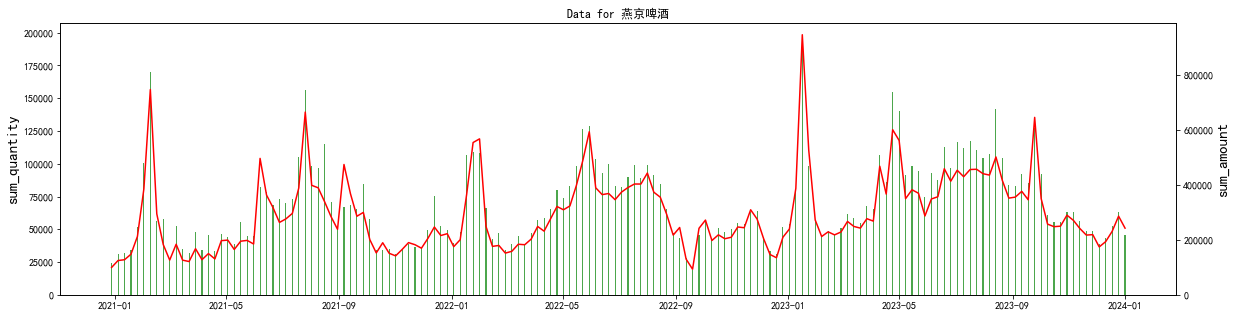

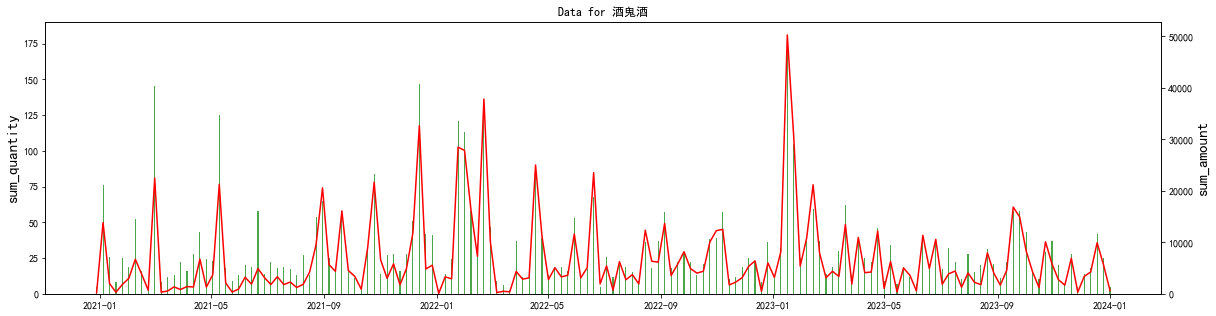

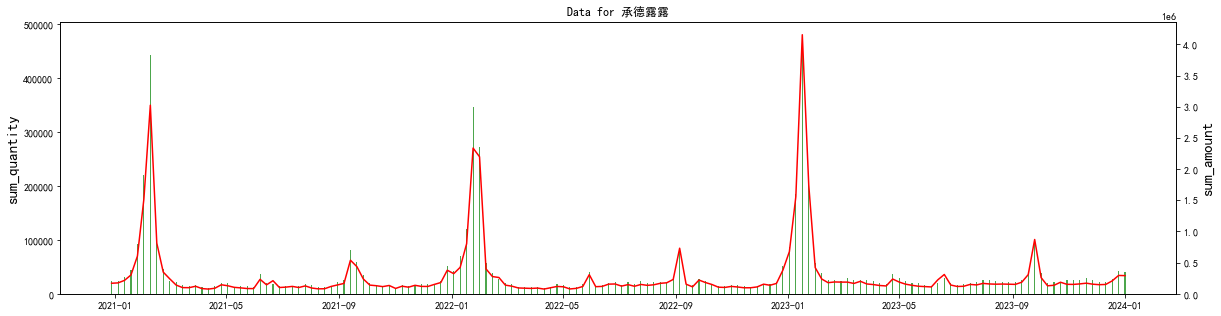

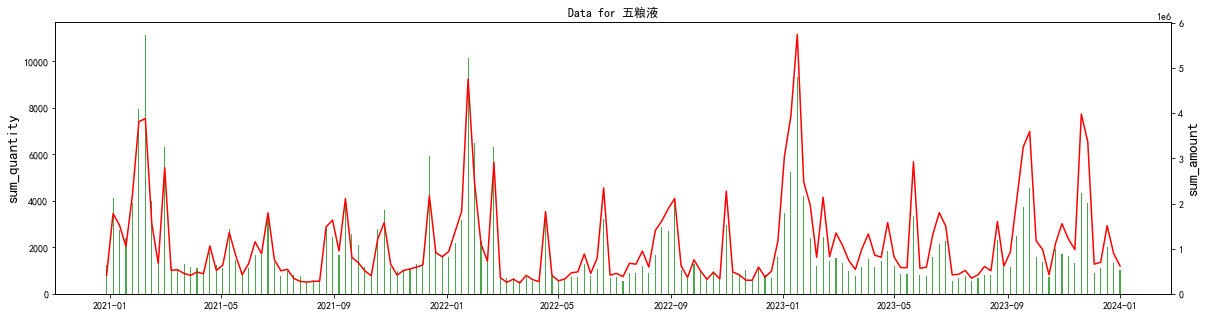

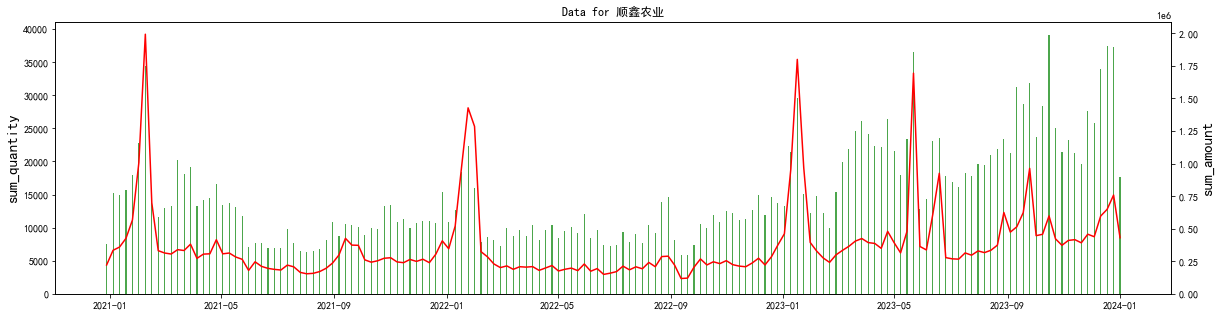

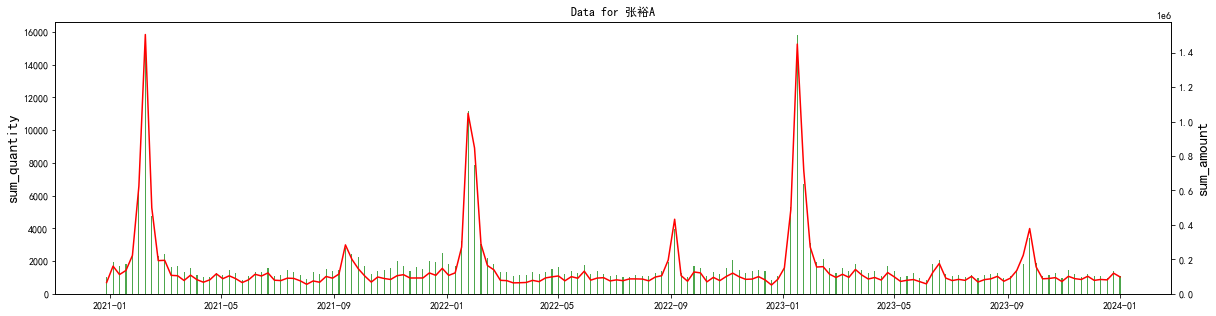

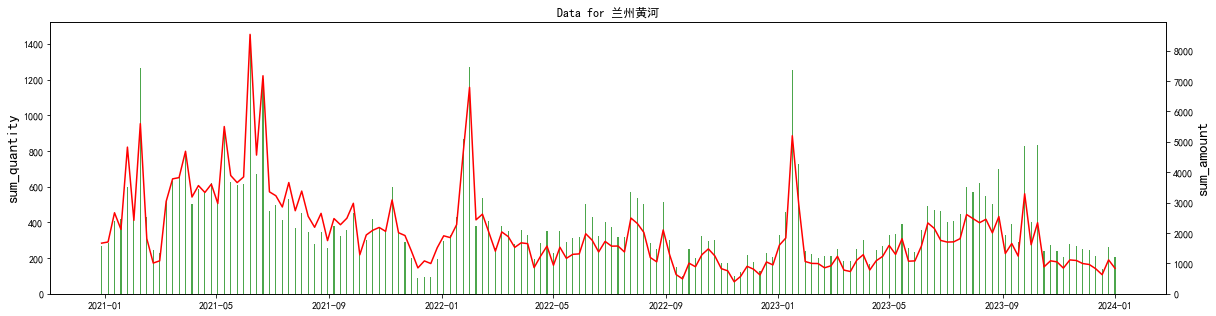

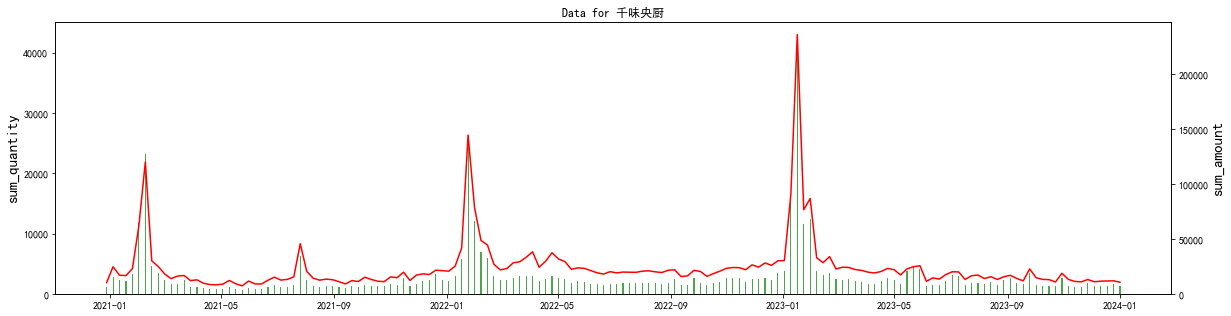

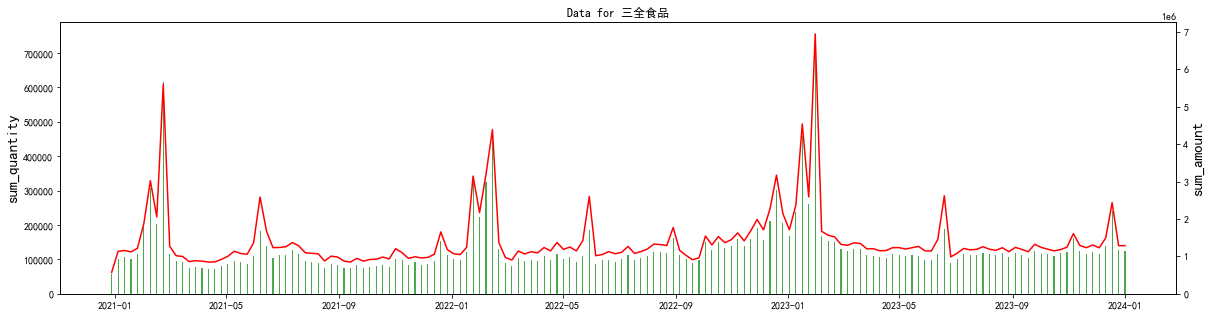

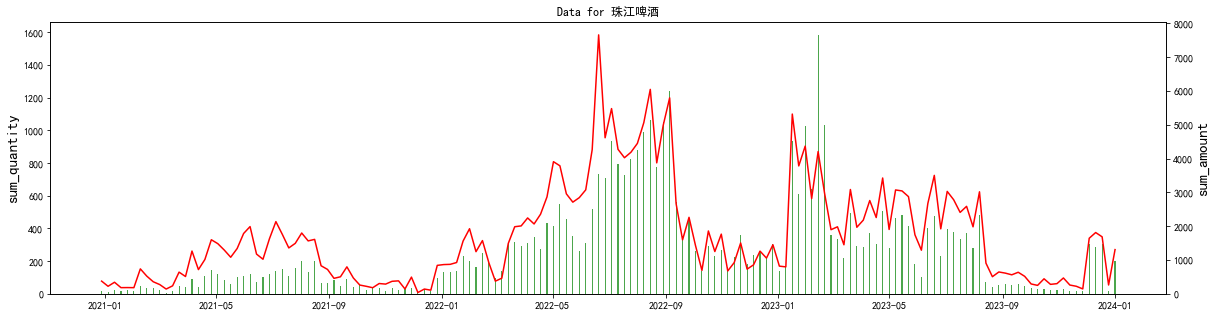

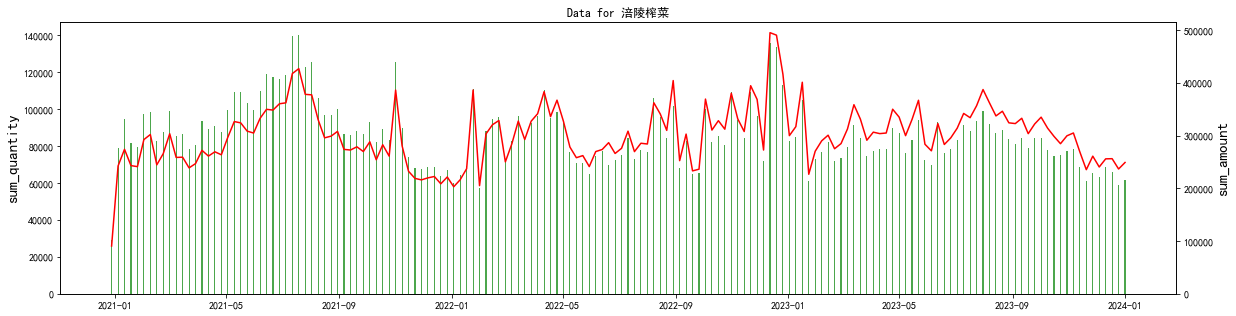

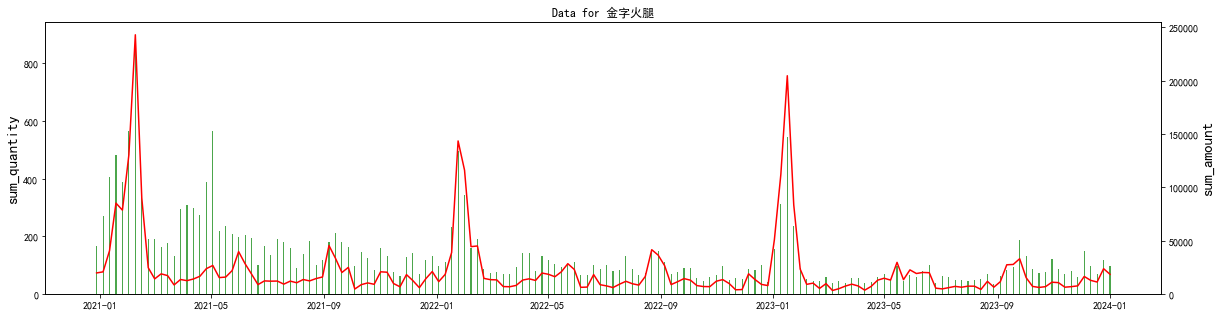

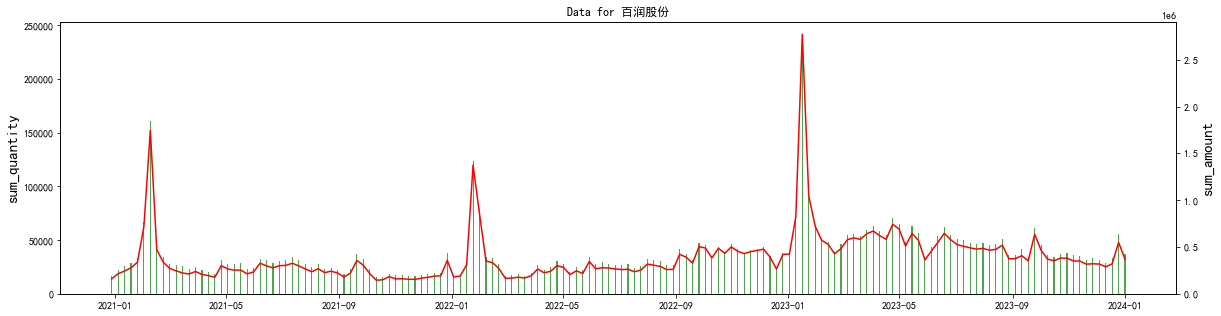

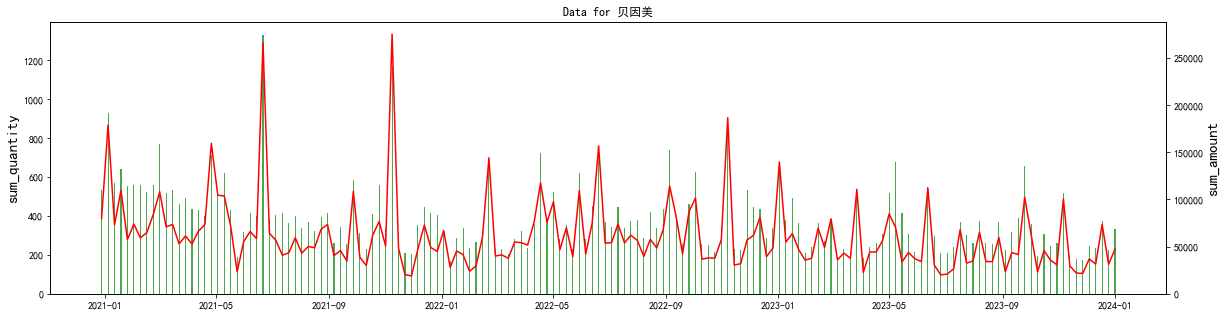

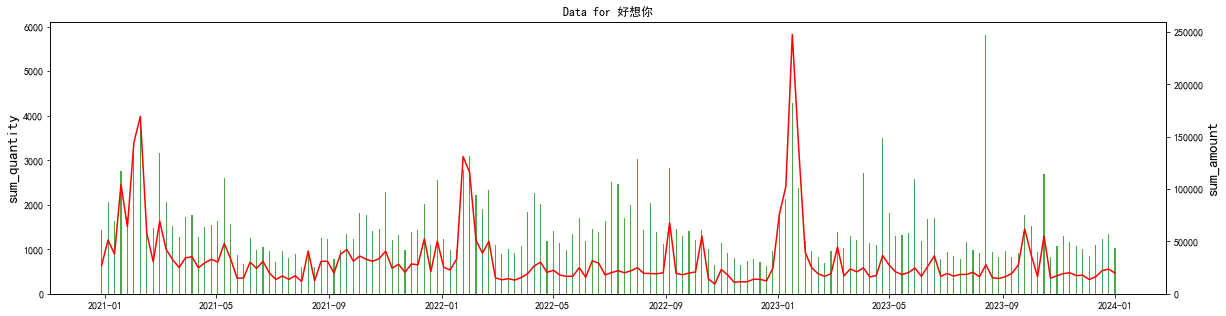

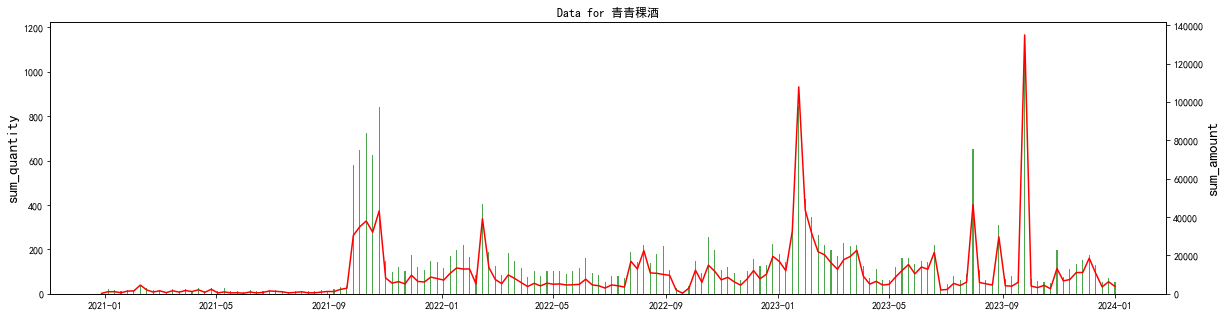

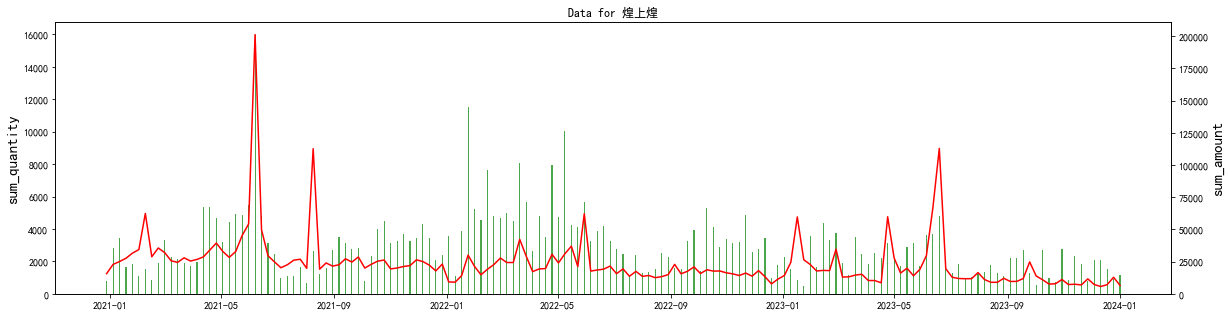

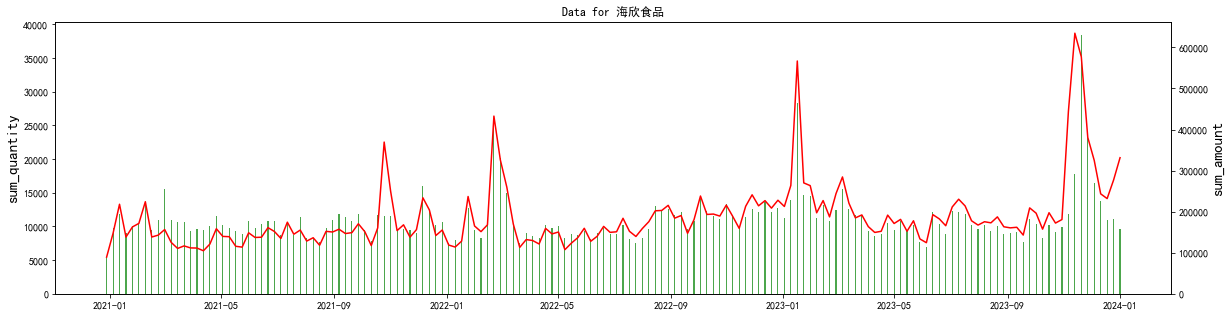

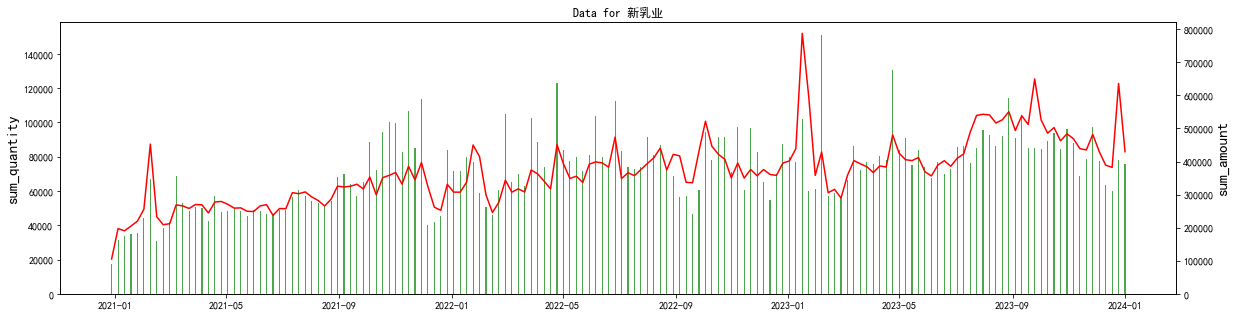

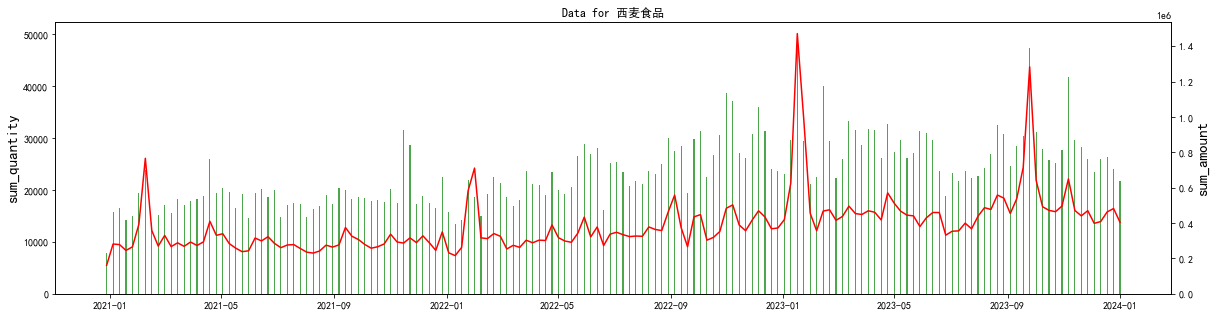

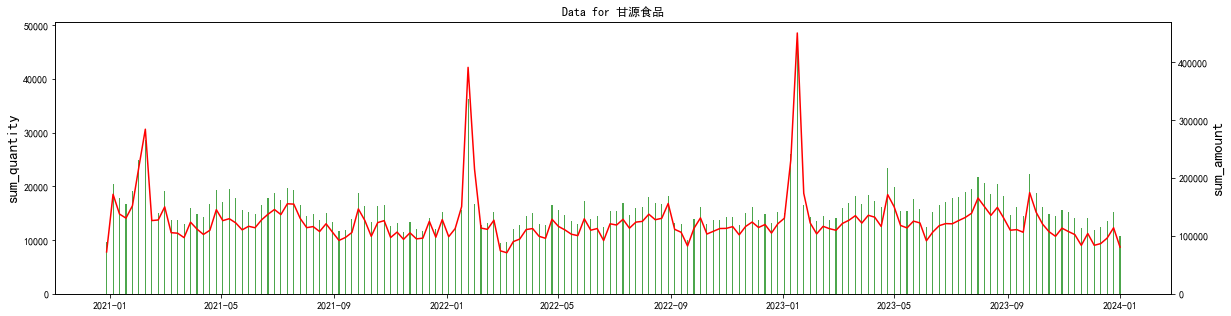

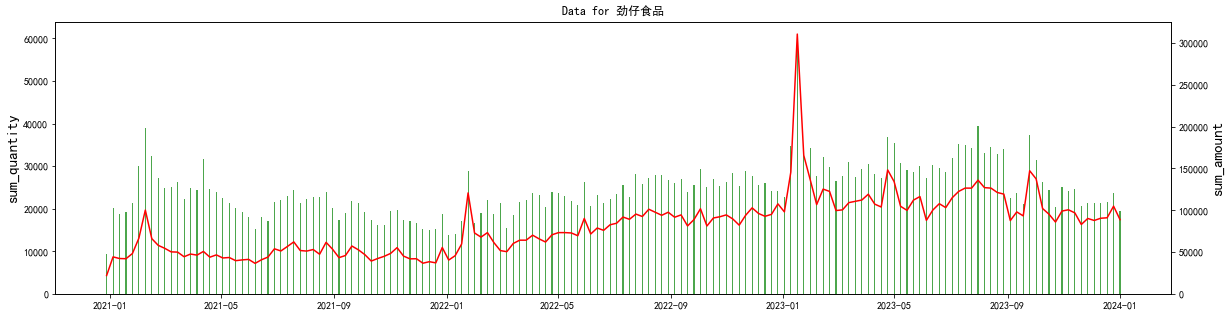

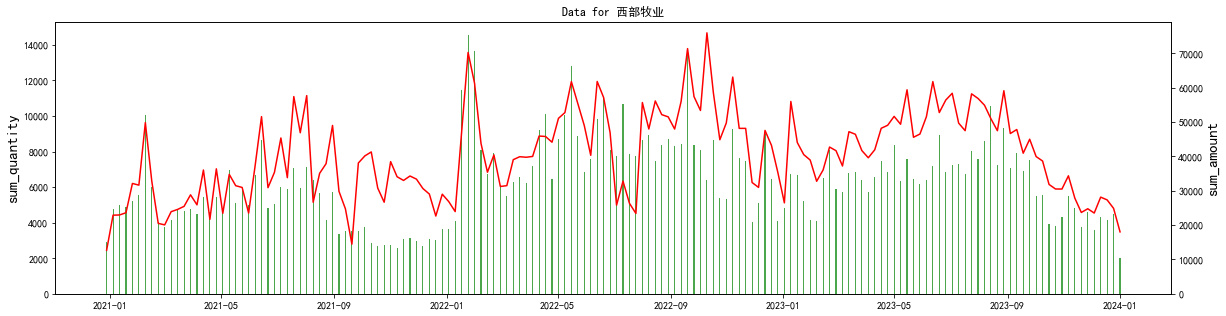

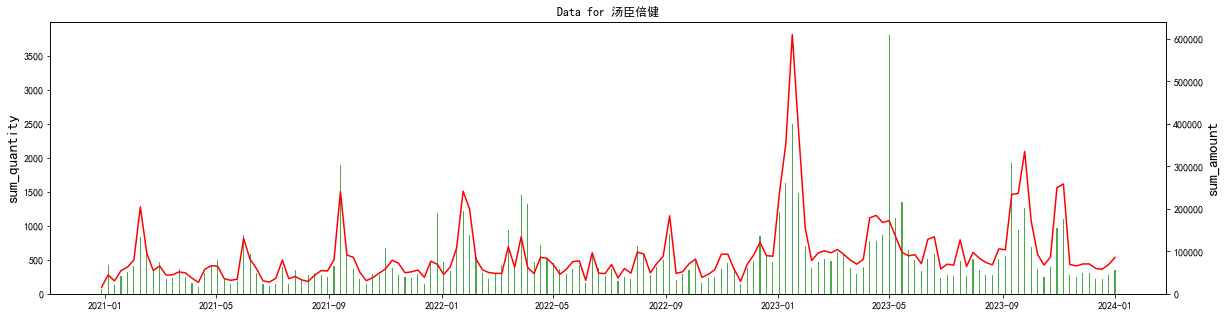

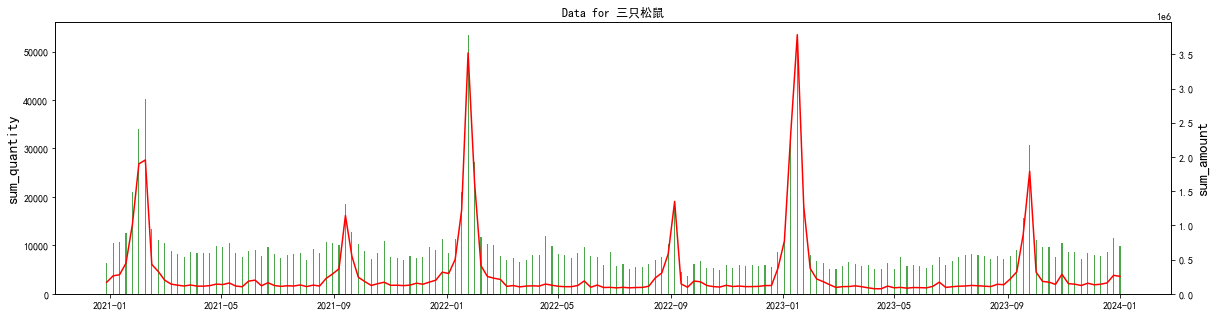

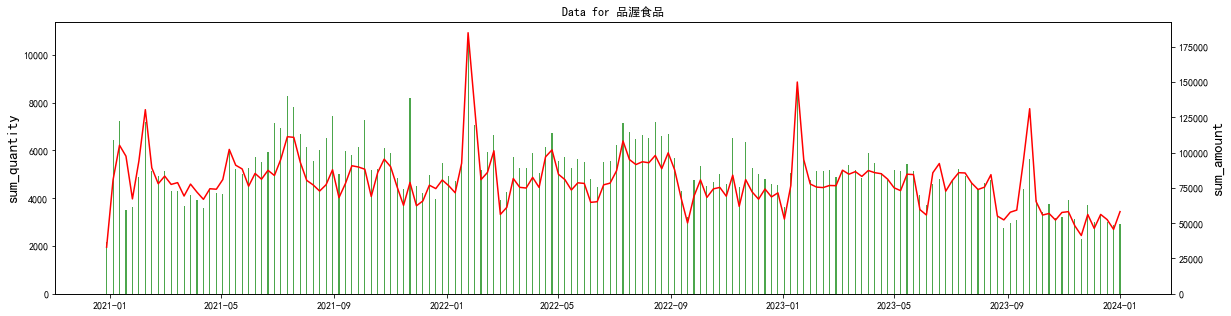

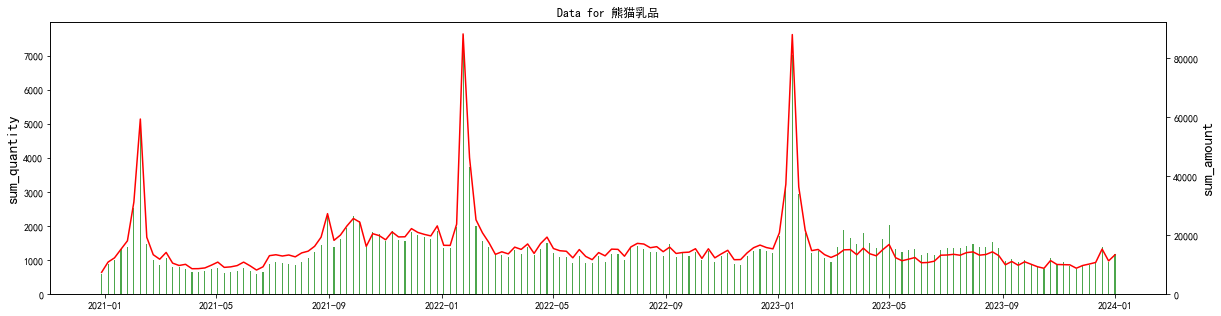

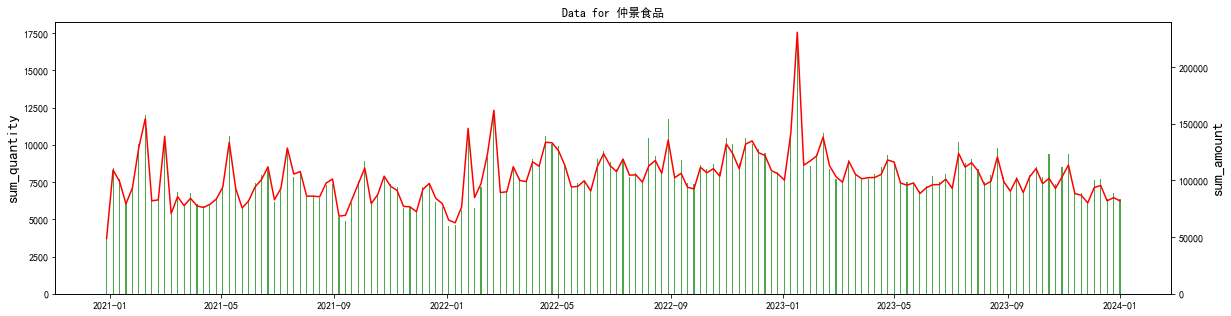

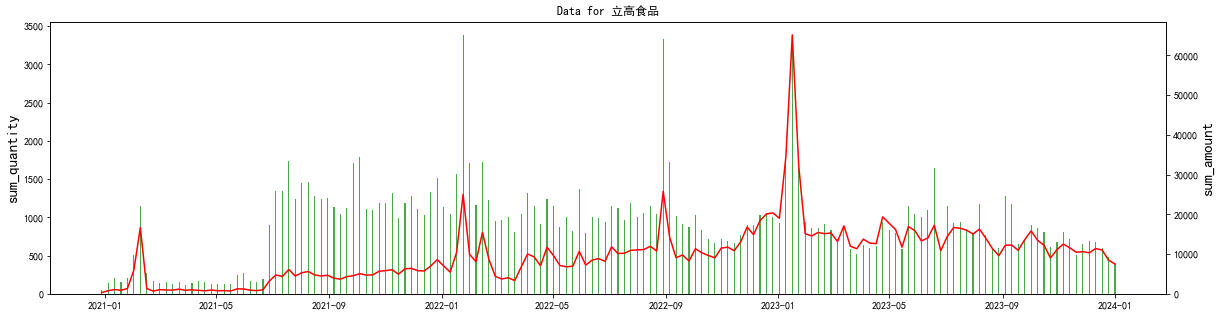

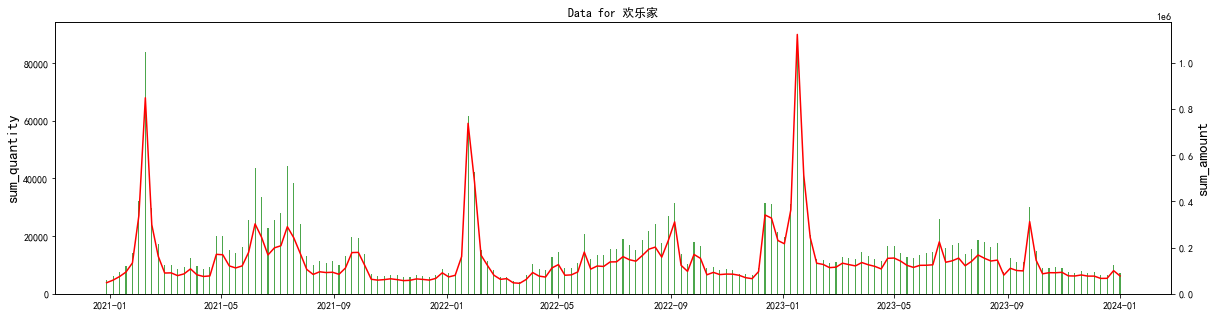

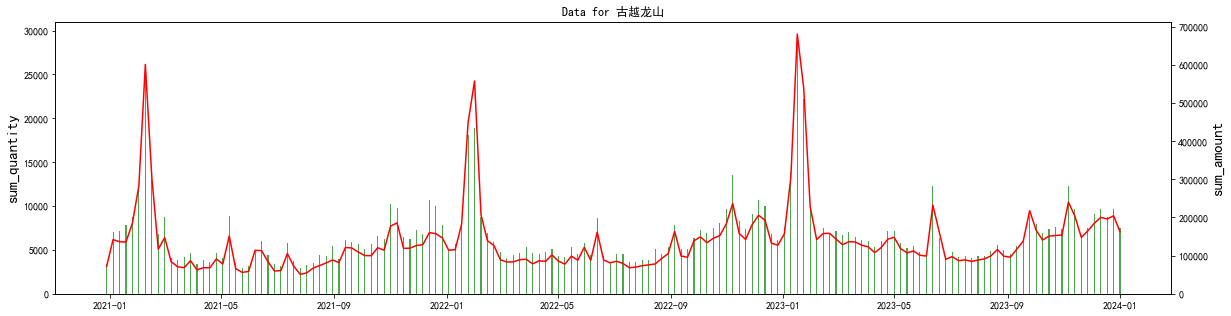

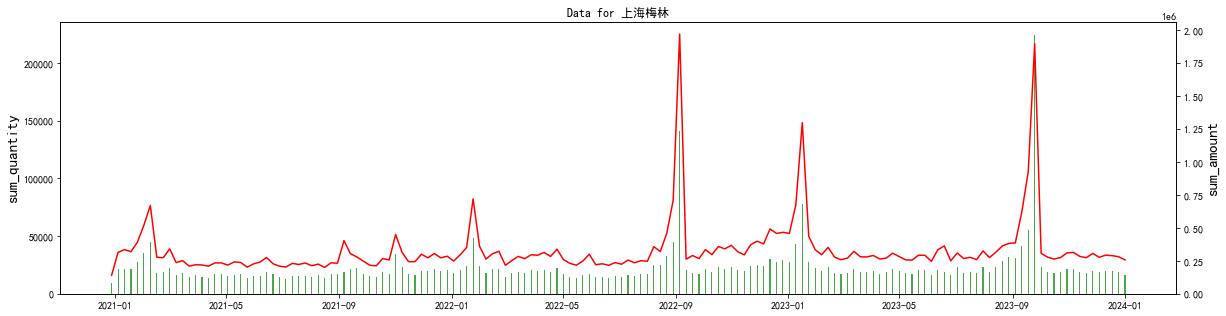

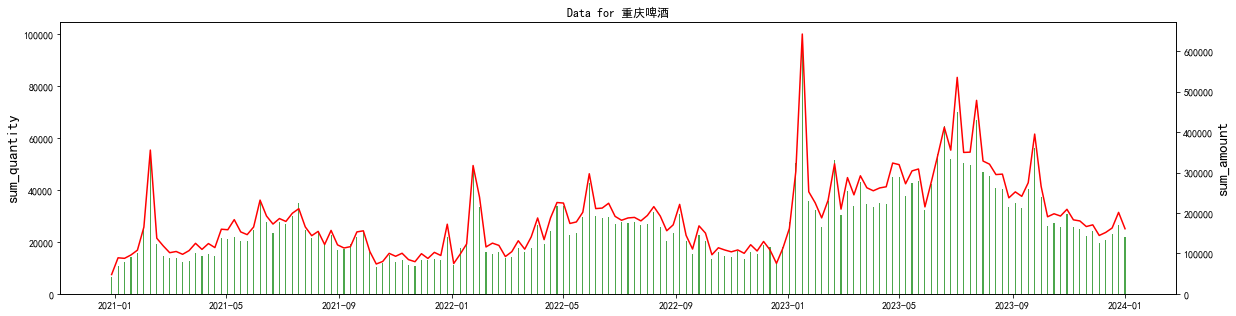

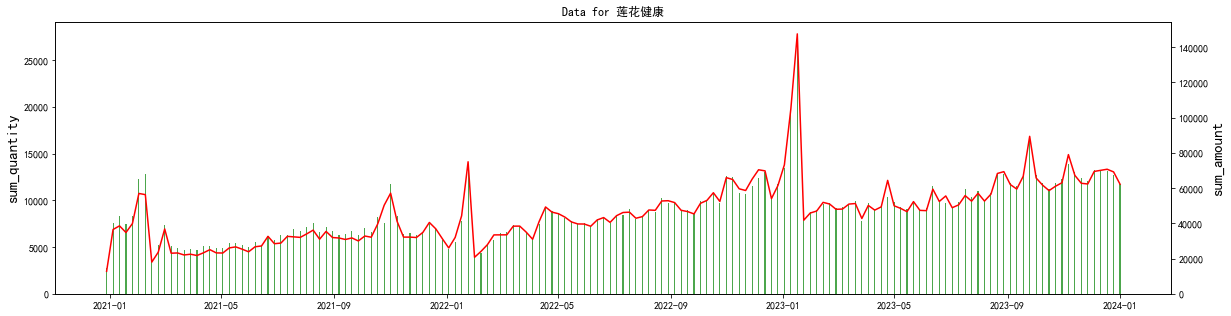

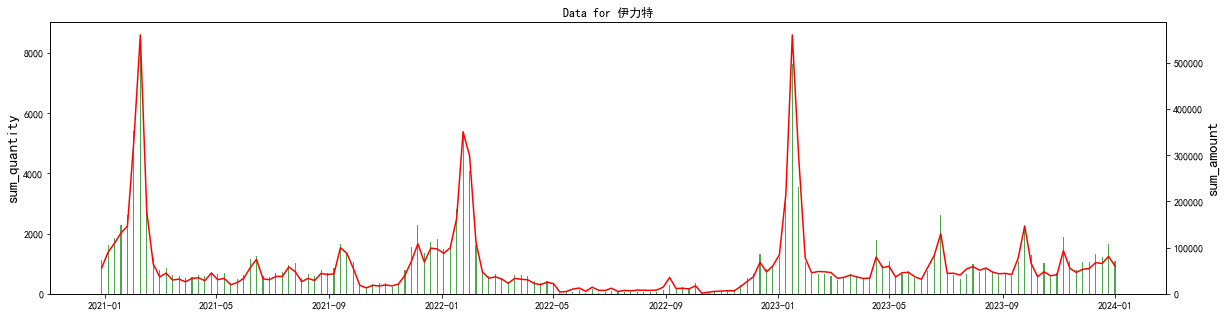

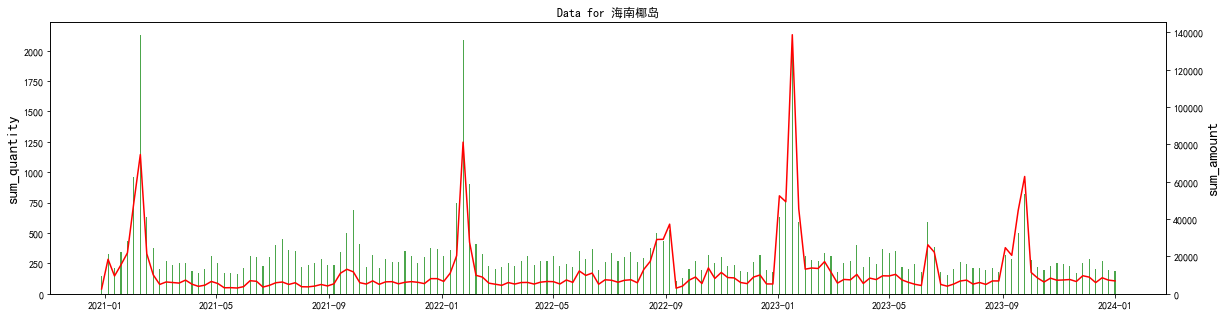

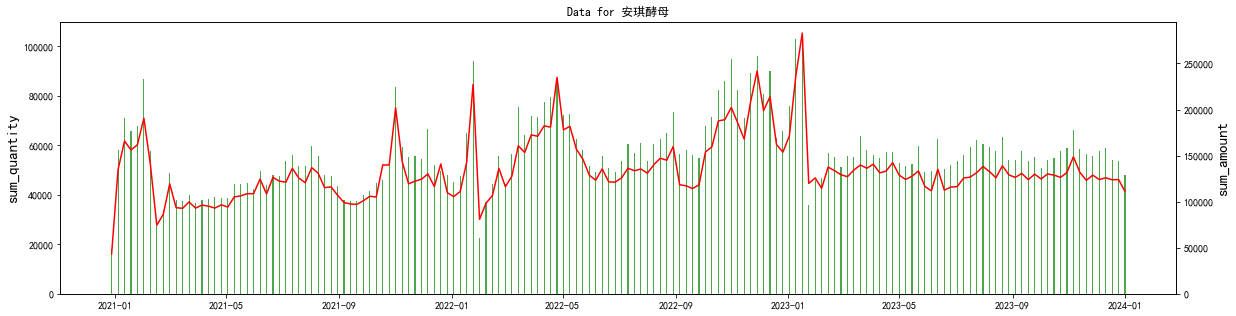

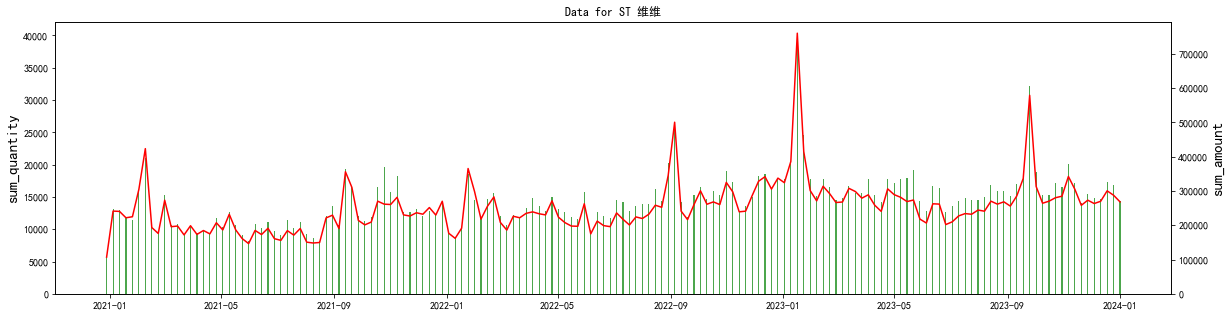

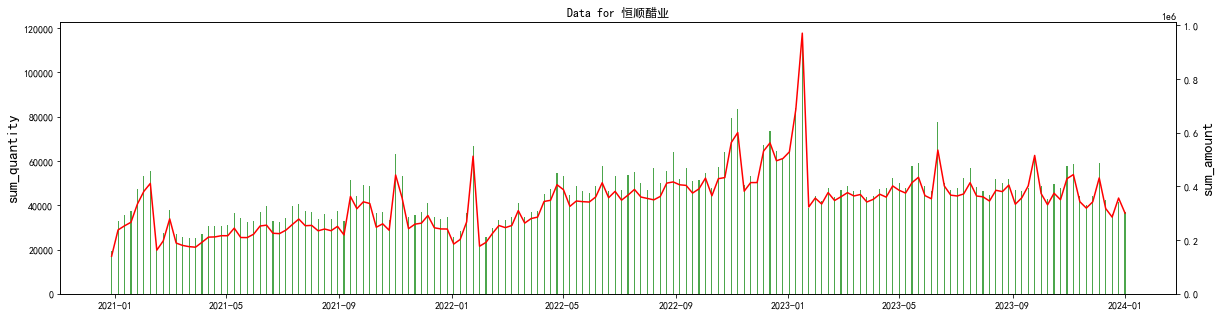

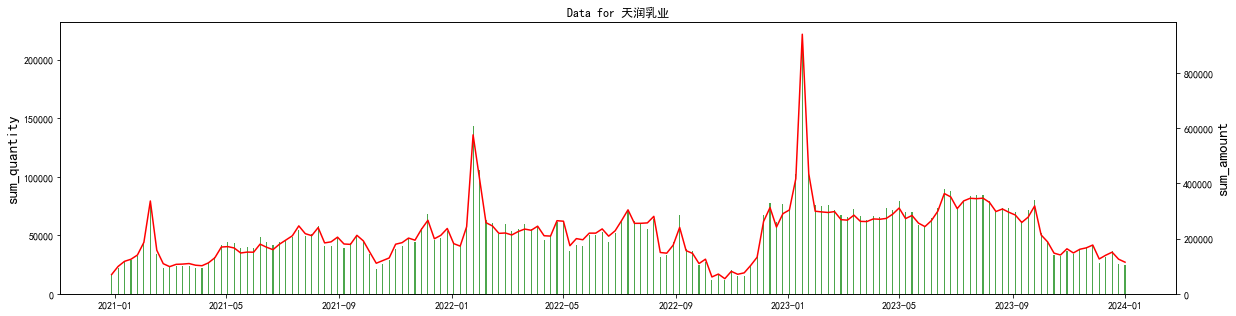

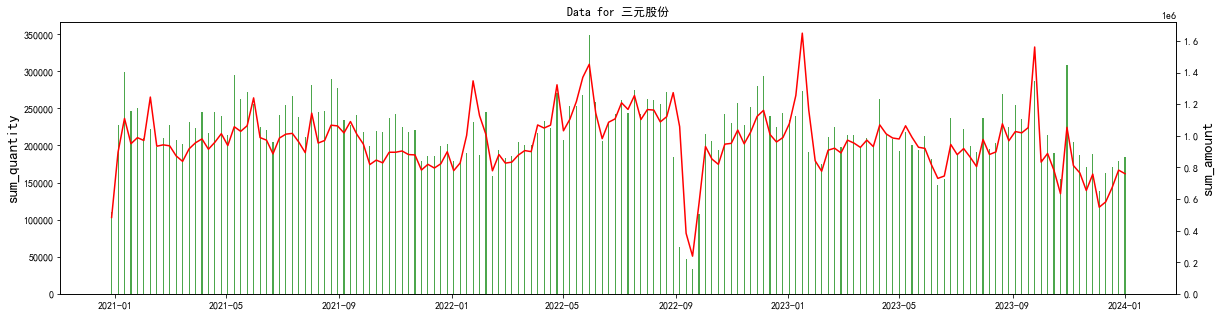

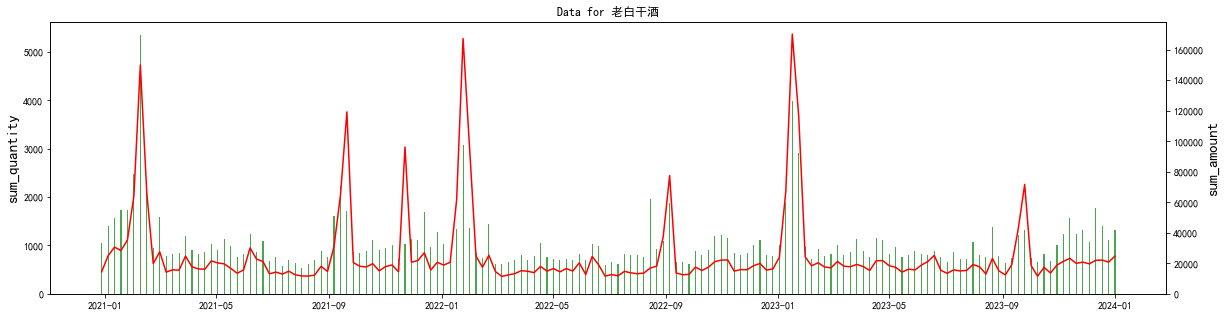

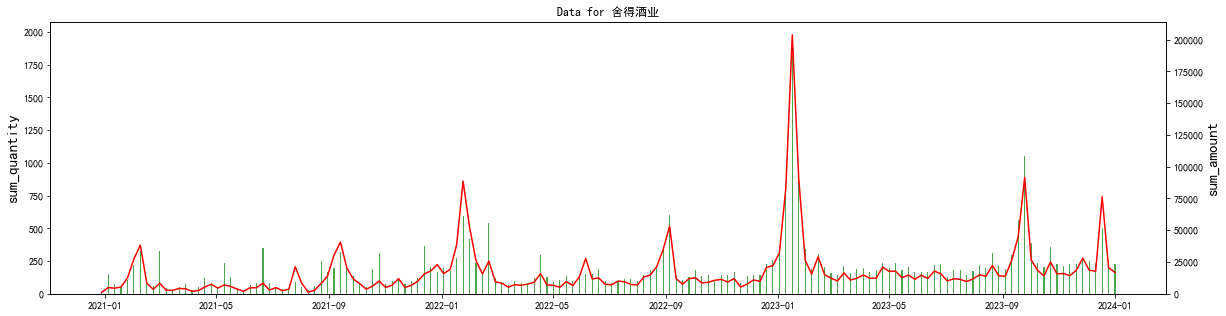

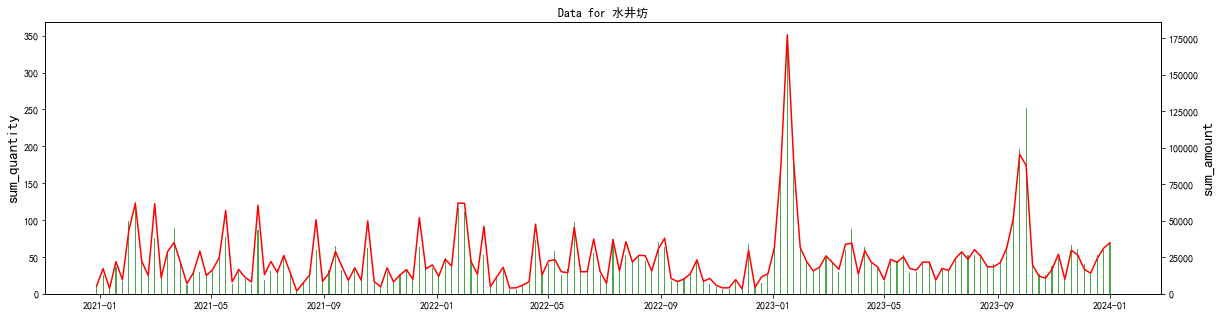

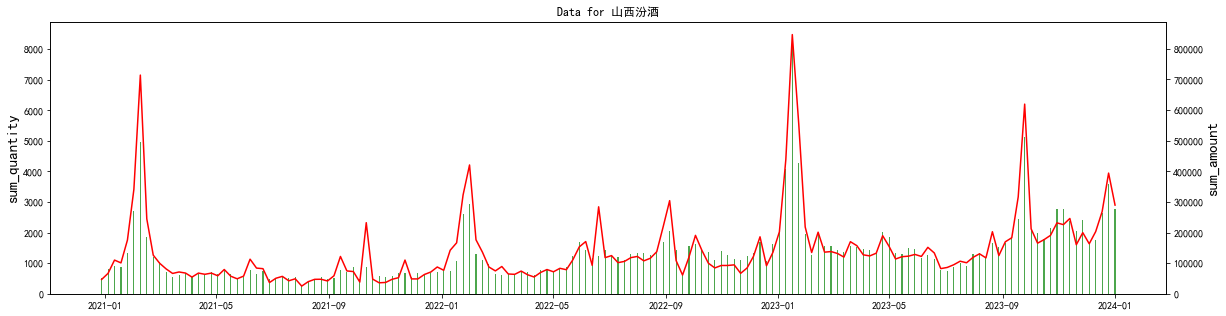

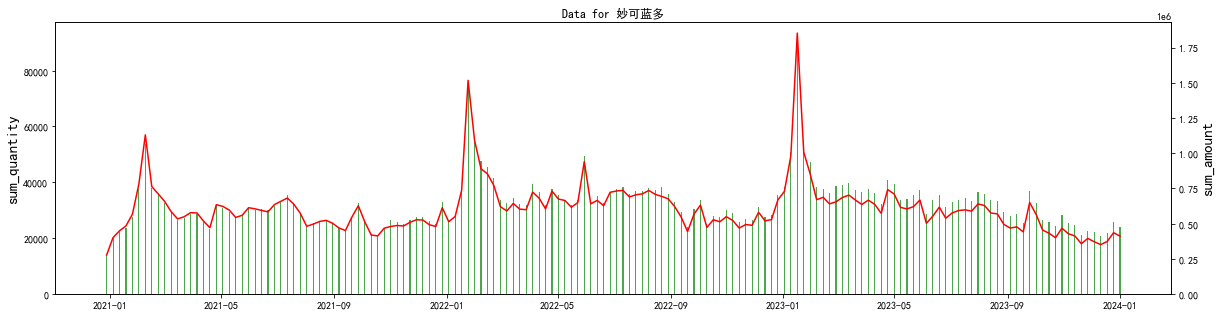

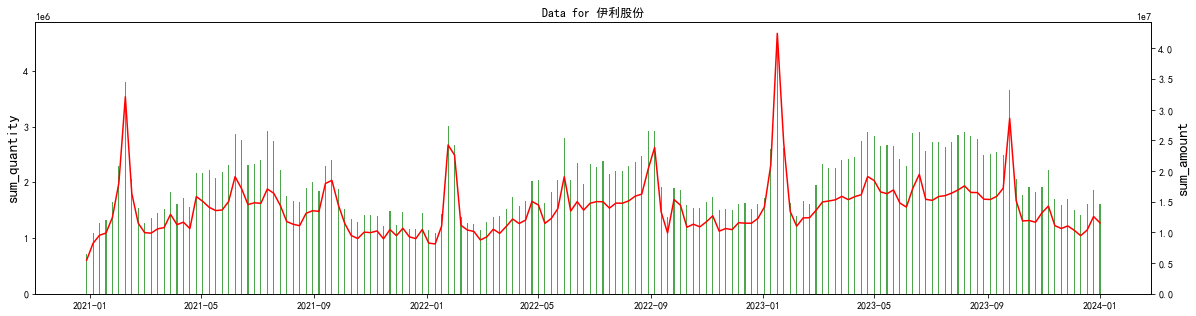

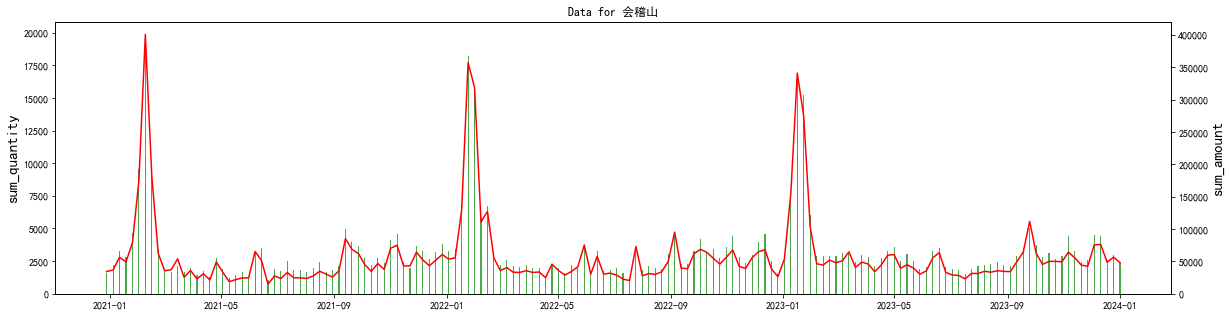

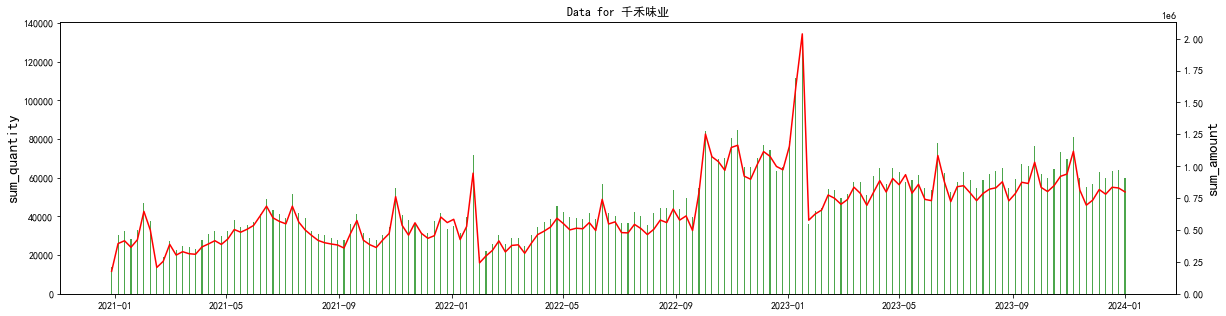

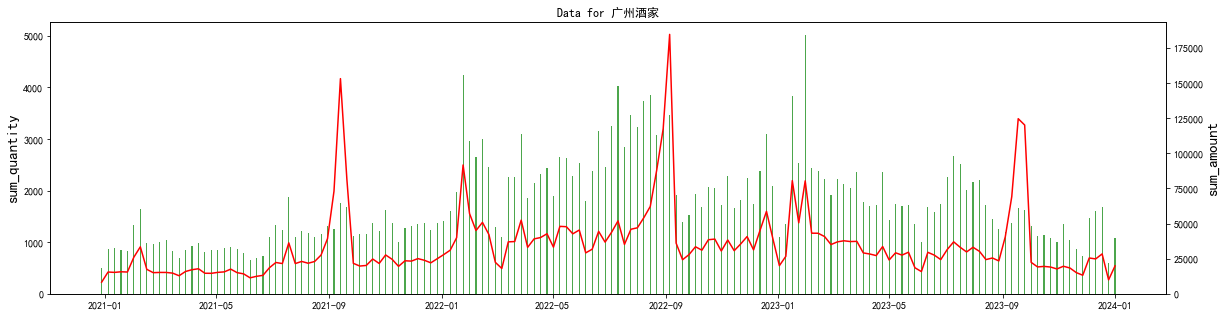

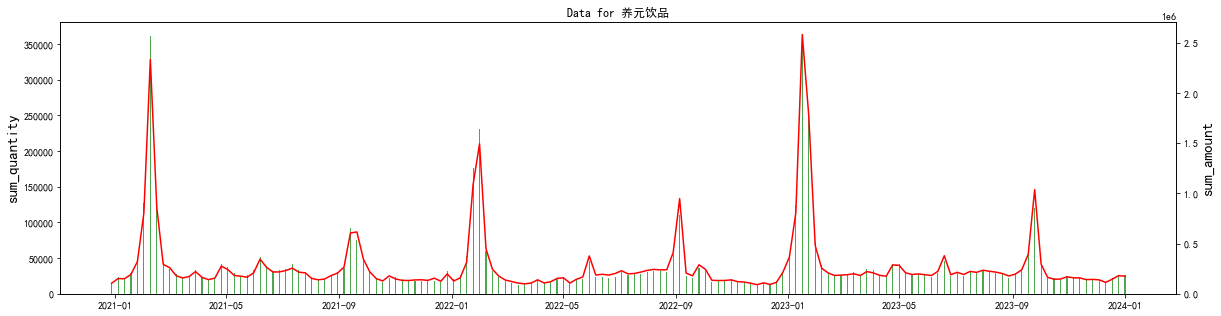

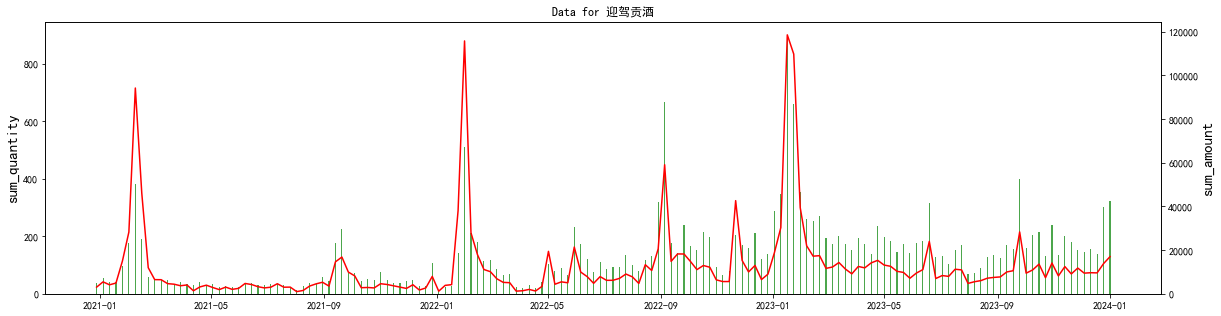

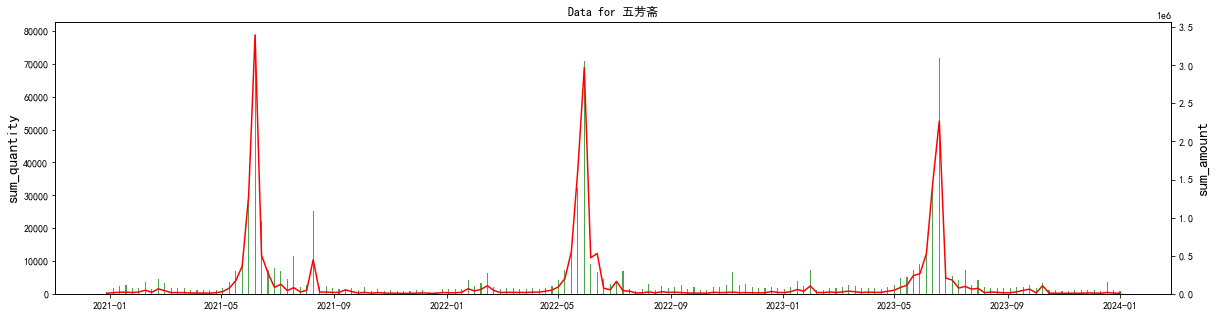

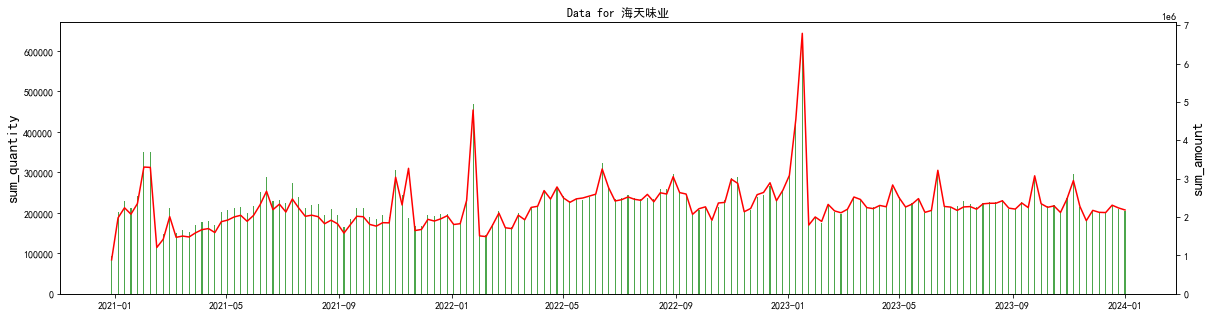

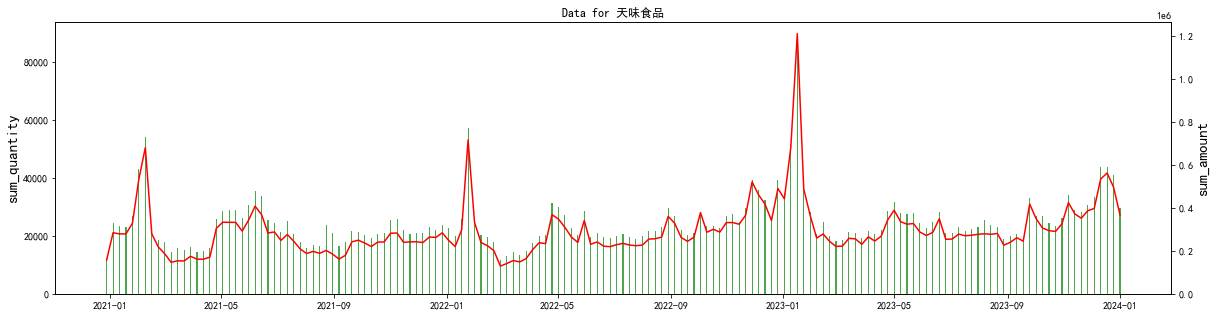

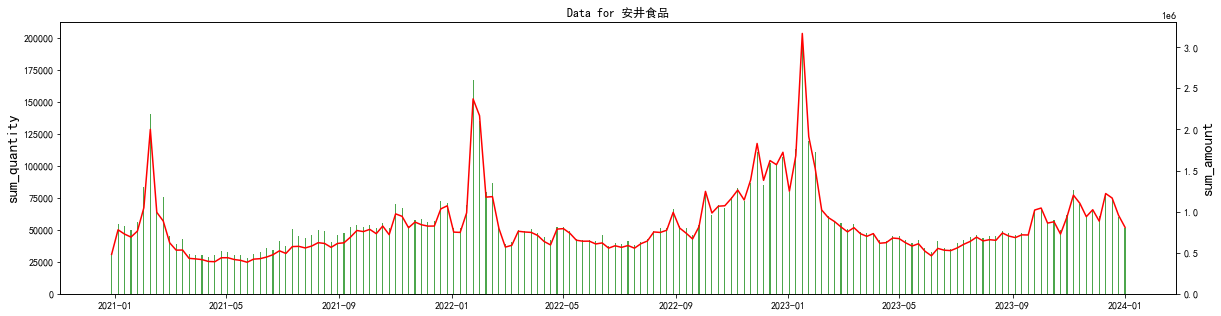

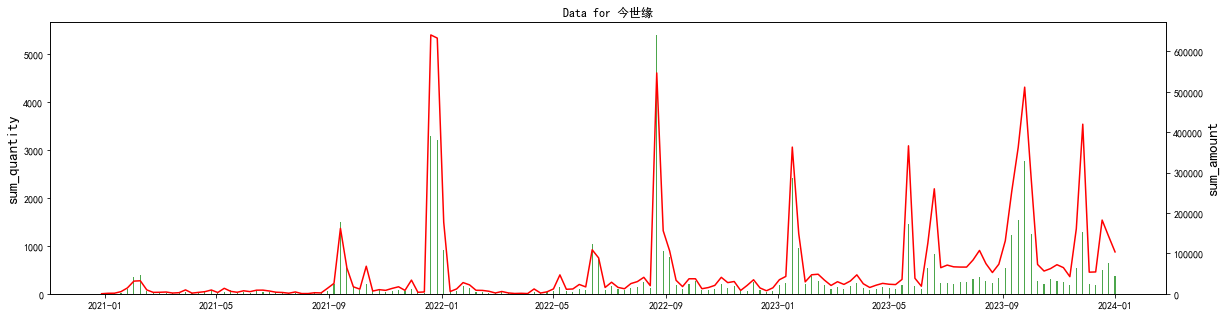

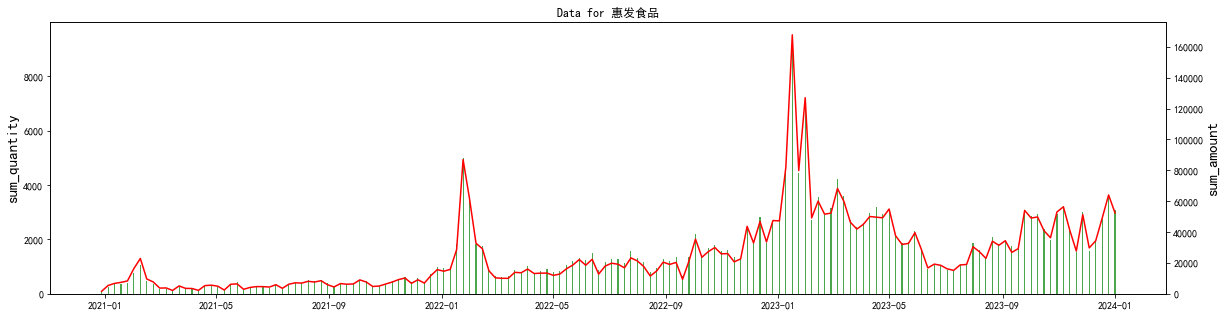

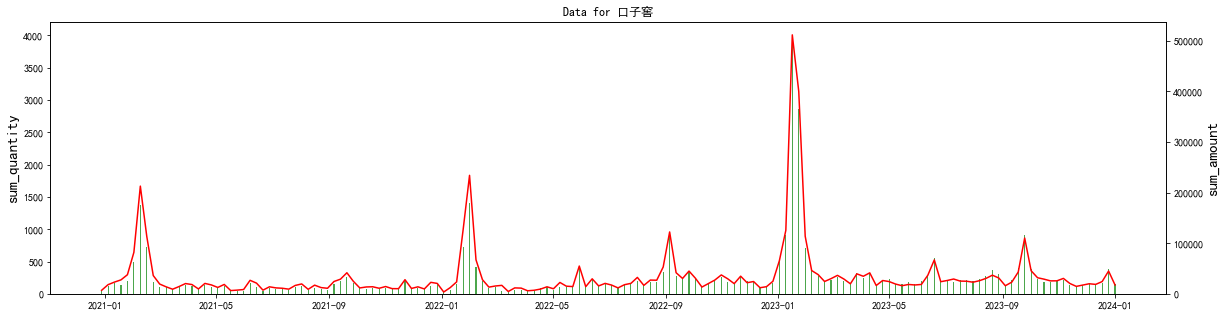

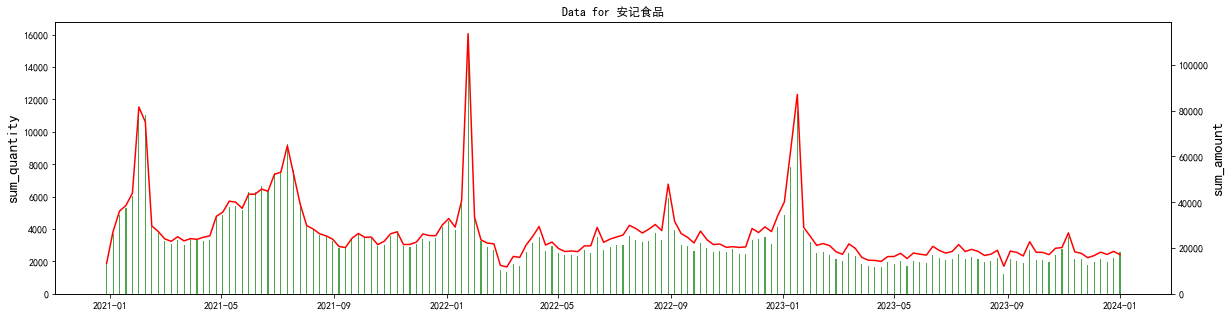

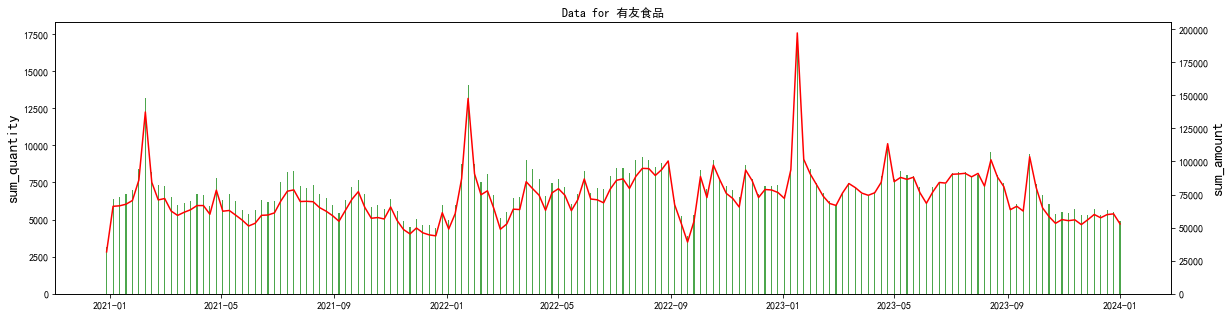

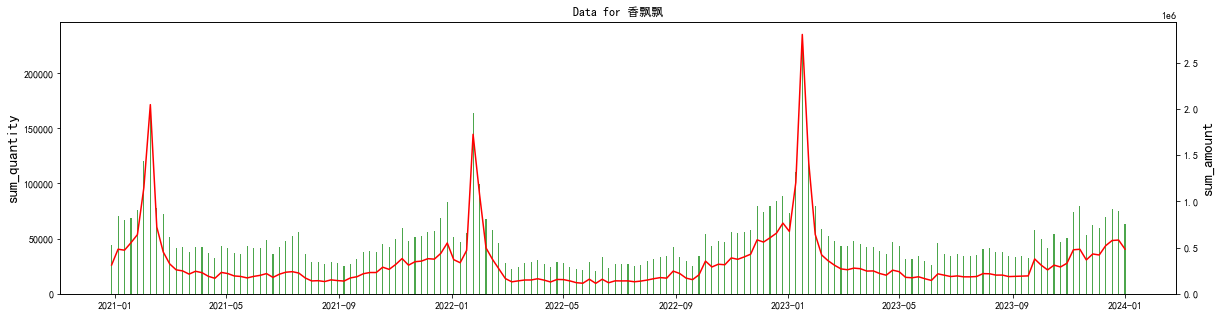

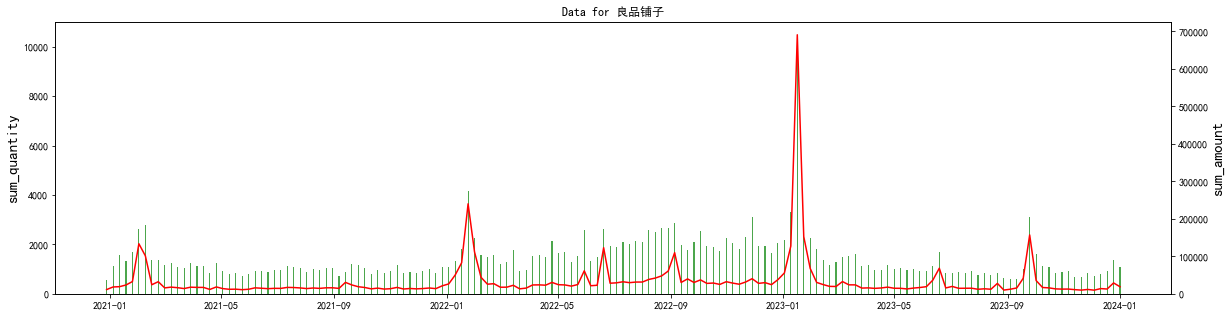

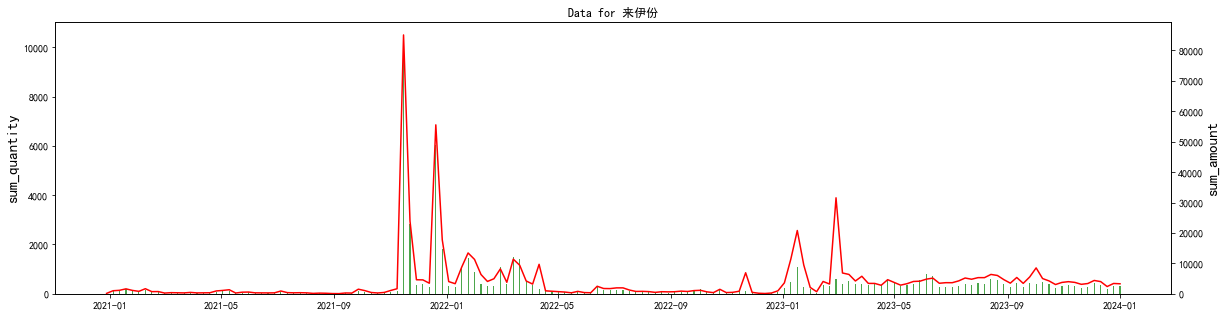

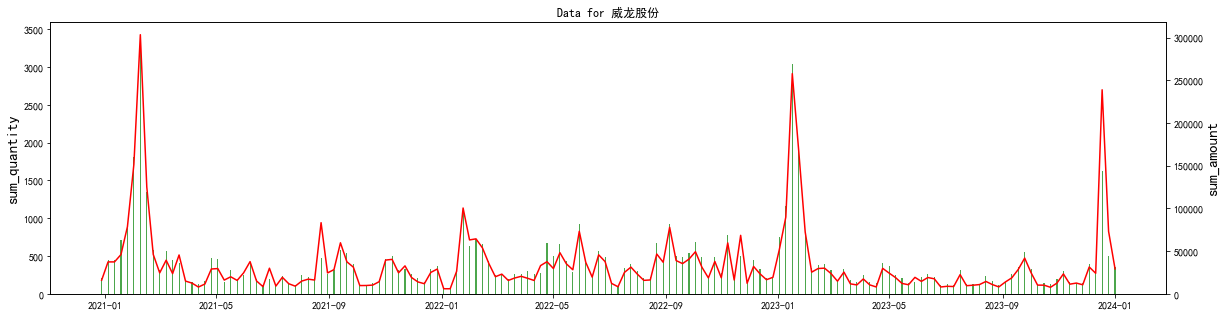

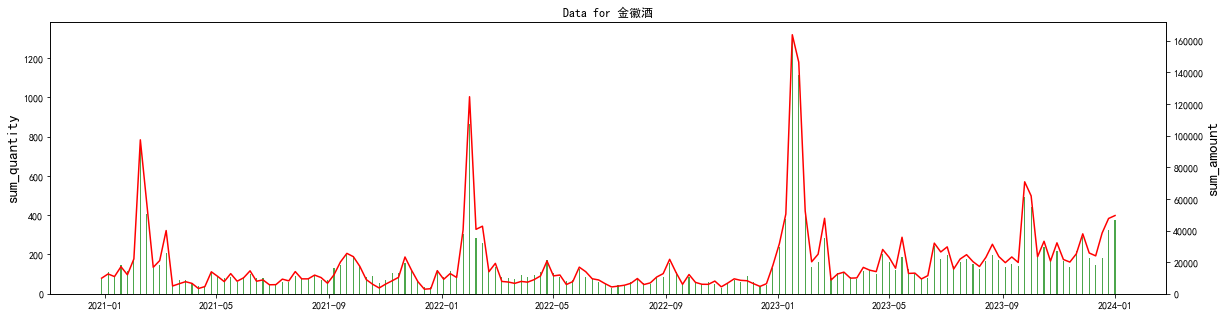

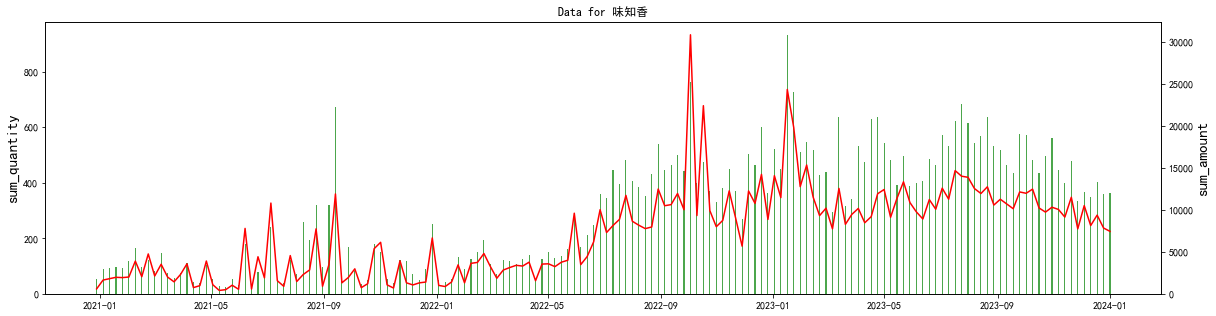

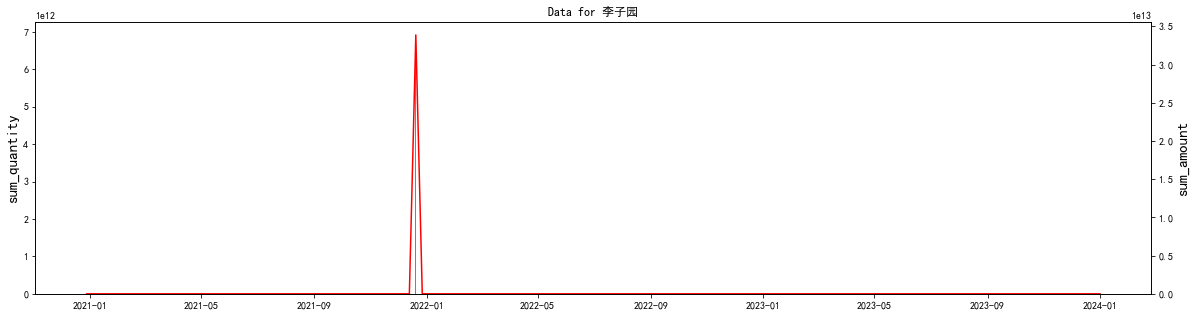

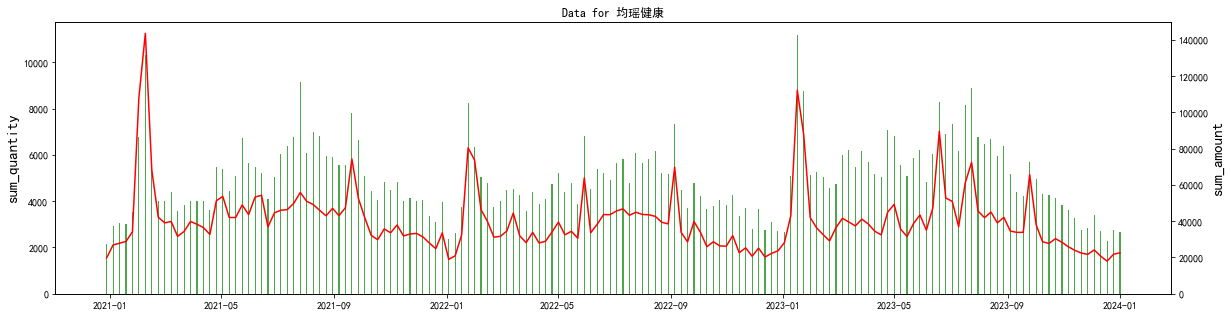

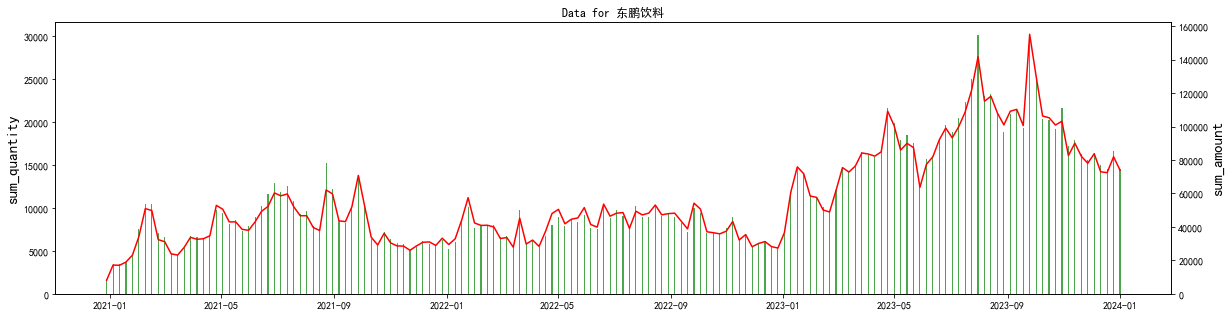

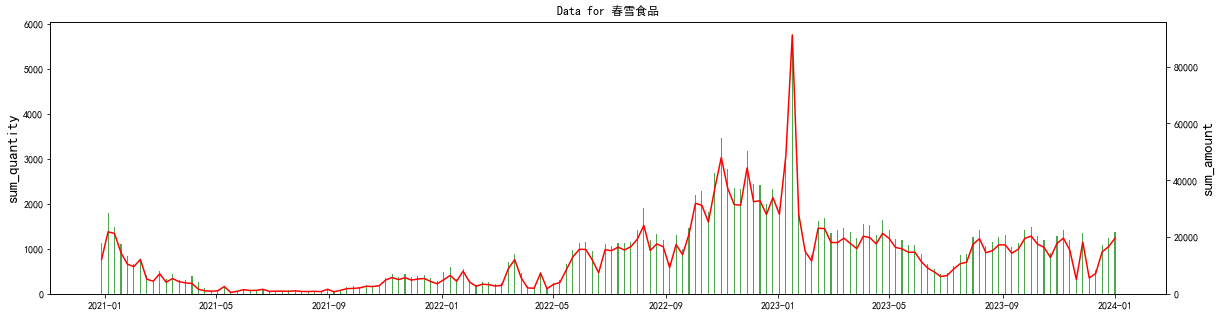

In [10]:
import seaborn as sns
shortnames = df['shortname'].unique()

for shortname in shortnames:
    symbol_data = df[df['shortname'] == shortname]
    plt.rcParams['figure.figsize'] = (20,5)
    fig = plt.figure()
    #画柱形图
    ax1 = fig.add_subplot(111)
    ax1.bar(symbol_data.to_numpy().T[1], symbol_data.to_numpy().T[5],label='sum_quantity',alpha=.7,color='g',width=1.2)
    ax1.set_ylabel('sum_quantity',fontsize='15')
    #ax1.set_title('数据统计',fontsize='20')
    #画折线图
    ax2 = ax1.twinx() #组合图必须加这个
    ax2.plot(symbol_data.to_numpy().T[1], symbol_data.to_numpy().T[4], label='sum_amount',color= 'r')
    ax2.set_ylabel('sum_amount',fontsize='15')
    ax2.set_ylim(bottom=0)
#     plt.subplots_adjust(wspace=0.3) 
    plt.title(f'Data for {shortname}')
    plt.xlabel('week_start_day')
    plt.xticks(rotation=45)
    plt.show()
    

# 添加门店信息

In [11]:
shop=pd.read_excel('门店个数.xlsx')
shop

week_start_day  count_ep  count_shop    sum_area
0       2020-12-28        61        1959  1785231.25
1       2021-01-04        63        1984  1834909.25
2       2021-01-11        62        1989  1844122.25
3       2021-01-18        62        2001  1855153.25
4       2021-01-25        62        2013  1861787.25
..             ...       ...         ...         ...
153     2023-12-04        81        2723  2810535.38
154     2023-12-11        80        2701  2781926.37
155     2023-12-18        77        2663  2804205.48
156     2023-12-25        72        2622  2698502.46
157     2024-01-01        72        2612  2716393.10

[158 rows x 4 columns]

In [12]:
df_avg=pd.merge(left=df, right=shop, left_on='week_start_day', right_on='week_start_day', how='left')

df_avg['area_sum_amount']=df_avg['sum_amount']/df_avg['sum_area']
df_avg['area_sum_quantity']=df_avg['sum_quantity']/df_avg['sum_area']
df_avg['area_sum_bill']=df_avg['sum_bill']/df_avg['sum_area']
df_avg

symbol week_start_day shortname  week_of_year  sum_amount  \
0         568     2020-12-28      泸州老窖            53    17915.00   
1         568     2021-01-04      泸州老窖             1   127278.00   
2         568     2021-01-11      泸州老窖             2    22462.00   
3         568     2021-01-18      泸州老窖             3   129942.00   
4         568     2021-01-25      泸州老窖             4    80747.00   
...       ...            ...       ...           ...         ...   
14215  605567     2023-12-04      春雪食品            49     5579.99   
14216  605567     2023-12-11      春雪食品            50     7151.02   
14217  605567     2023-12-18      春雪食品            51    14751.70   
14218  605567     2023-12-25      春雪食品            52    16598.87   
14219  605567     2024-01-01      春雪食品             1    19604.36   

       sum_quantity  sum_bill  count_ep  count_shop    sum_area  \
0                19         6        61        1959  1785231.25   
1               130        23        63        1984  1834909.25   
2                24        11        62        1989  1844122.25   
3               133        26        62        2001  1855153.25   
4                88        24        62        2013  1861787.25   
...             ...       ...       ...         ...         ...   
14215           405       371        81        2723  2810535.38   
14216           532       468        80        2701  2781926.37   
14217          1079       913        77        2663  2804205.48   
14218          1237      1045        72        2622  2698502.46   
14219          1374      1162        72        2612  2716393.10   

       area_sum_amount  area_sum_quantity  area_sum_bill  
0             0.010035           0.000011       0.000003  
1             0.069365           0.000071       0.000013  
2             0.012180           0.000013       0.000006  
3             0.070044           0.000072       0.000014  
4             0.043371           0.000047       0.000013  
...                ...                ...            ...  
14215         0.001985           0.000144       0.000132  
14216         0.002571           0.000191       0.000168  
14217         0.005261           0.000385       0.000326  
14218         0.006151           0.000458       0.000387  
14219         0.007217           0.000506       0.000428  

[14220 rows x 13 columns]

In [13]:
df_avg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14220 entries, 0 to 14219
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   symbol             14220 non-null  int64         
 1   week_start_day     14220 non-null  datetime64[ns]
 2   shortname          14220 non-null  object        
 3   week_of_year       14220 non-null  int64         
 4   sum_amount         14220 non-null  float64       
 5   sum_quantity       14220 non-null  int64         
 6   sum_bill           14220 non-null  int64         
 7   count_ep           14220 non-null  int64         
 8   count_shop         14220 non-null  int64         
 9   sum_area           14220 non-null  float64       
 10  area_sum_amount    14220 non-null  float64       
 11  area_sum_quantity  14220 non-null  float64       
 12  area_sum_bill      14220 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(6), object(1)
memory 

# 环比

In [14]:
df_avg

symbol week_start_day shortname  week_of_year  sum_amount  \
0         568     2020-12-28      泸州老窖            53    17915.00   
1         568     2021-01-04      泸州老窖             1   127278.00   
2         568     2021-01-11      泸州老窖             2    22462.00   
3         568     2021-01-18      泸州老窖             3   129942.00   
4         568     2021-01-25      泸州老窖             4    80747.00   
...       ...            ...       ...           ...         ...   
14215  605567     2023-12-04      春雪食品            49     5579.99   
14216  605567     2023-12-11      春雪食品            50     7151.02   
14217  605567     2023-12-18      春雪食品            51    14751.70   
14218  605567     2023-12-25      春雪食品            52    16598.87   
14219  605567     2024-01-01      春雪食品             1    19604.36   

       sum_quantity  sum_bill  count_ep  count_shop    sum_area  \
0                19         6        61        1959  1785231.25   
1               130        23        63        1984  1834909.25   
2                24        11        62        1989  1844122.25   
3               133        26        62        2001  1855153.25   
4                88        24        62        2013  1861787.25   
...             ...       ...       ...         ...         ...   
14215           405       371        81        2723  2810535.38   
14216           532       468        80        2701  2781926.37   
14217          1079       913        77        2663  2804205.48   
14218          1237      1045        72        2622  2698502.46   
14219          1374      1162        72        2612  2716393.10   

       area_sum_amount  area_sum_quantity  area_sum_bill  
0             0.010035           0.000011       0.000003  
1             0.069365           0.000071       0.000013  
2             0.012180           0.000013       0.000006  
3             0.070044           0.000072       0.000014  
4             0.043371           0.000047       0.000013  
...                ...                ...            ...  
14215         0.001985           0.000144       0.000132  
14216         0.002571           0.000191       0.000168  
14217         0.005261           0.000385       0.000326  
14218         0.006151           0.000458       0.000387  
14219         0.007217           0.000506       0.000428  

[14220 rows x 13 columns]

In [15]:
def ratio(df,list_column):
    for column in list_column:
        column_name=column+'_ratio'
        df[column_name]=(df[column]-df[column].shift(1))/df[column].shift(1)

In [16]:
shortnames = df_avg['shortname'].unique()
data_final=pd.DataFrame()
for shortname in shortnames:
    symbol_data = df_avg[df_avg['shortname'] == shortname]
    ratio(symbol_data,['area_sum_amount', 'area_sum_quantity', 'area_sum_bill'])
    symbol_data=symbol_data.dropna()
    data_final=pd.concat([data_final, symbol_data], ignore_index=True)
data_final

symbol week_start_day shortname  week_of_year  sum_amount  \
0         568     2021-01-04      泸州老窖             1   127278.00   
1         568     2021-01-11      泸州老窖             2    22462.00   
2         568     2021-01-18      泸州老窖             3   129942.00   
3         568     2021-01-25      泸州老窖             4    80747.00   
4         568     2021-02-01      泸州老窖             5   129299.00   
...       ...            ...       ...           ...         ...   
14125  605567     2023-12-04      春雪食品            49     5579.99   
14126  605567     2023-12-11      春雪食品            50     7151.02   
14127  605567     2023-12-18      春雪食品            51    14751.70   
14128  605567     2023-12-25      春雪食品            52    16598.87   
14129  605567     2024-01-01      春雪食品             1    19604.36   

       sum_quantity  sum_bill  count_ep  count_shop    sum_area  \
0               130        23        63        1984  1834909.25   
1                24        11        62        1989  1844122.25   
2               133        26        62        2001  1855153.25   
3                88        24        62        2013  1861787.25   
4               138        39        62        1979  1825671.67   
...             ...       ...       ...         ...         ...   
14125           405       371        81        2723  2810535.38   
14126           532       468        80        2701  2781926.37   
14127          1079       913        77        2663  2804205.48   
14128          1237      1045        72        2622  2698502.46   
14129          1374      1162        72        2612  2716393.10   

       area_sum_amount  area_sum_quantity  area_sum_bill  \
0             0.069365           0.000071       0.000013   
1             0.012180           0.000013       0.000006   
2             0.070044           0.000072       0.000014   
3             0.043371           0.000047       0.000013   
4             0.070823           0.000076       0.000021   
...                ...                ...            ...   
14125         0.001985           0.000144       0.000132   
14126         0.002571           0.000191       0.000168   
14127         0.005261           0.000385       0.000326   
14128         0.006151           0.000458       0.000387   
14129         0.007217           0.000506       0.000428   

       area_sum_amount_ratio  area_sum_quantity_ratio  area_sum_bill_ratio  
0                   5.912202                 5.656863             2.729550  
1                  -0.824402                -0.816307            -0.524128  
2                   4.750572                 4.508715             1.349582  
3                  -0.380806                -0.340703            -0.080212  
4                   0.632962                 0.599204             0.657146  
...                      ...                      ...                  ...  
14125              -0.676193                -0.680468            -0.641861  
14126               0.294726                 0.327089             0.274428  
14127               1.046491                 1.012082             0.935355  
14128               0.169293                 0.191339             0.189413  
14129               0.173287                 0.103436             0.104638  

[14130 rows x 16 columns]

In [17]:
data_final.to_excel('食品饮料周度_avg.xlsx',index=False)

# 平稳性检验

In [18]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
def adf_result(data):
    # 对时间序列进行ADF测试
    result = adfuller(data)
    # 输出结果转化为DataFrame
    output_results = pd.DataFrame({
        'ADF Statistic': [result[0]],
        'P-Value': [result[1]],
        'Lags': [result[2]],
        'Observations': [result[3]]
    })

    # 添加临界值
    critical_values = result[4]
    for key, value in critical_values.items():
        output_results[f'{key}% Critical Value'] = value
    
    return output_results

In [19]:
data_final.columns

Index(['symbol', 'week_start_day', 'shortname', 'week_of_year', 'sum_amount',
       'sum_quantity', 'sum_bill', 'count_ep', 'count_shop', 'sum_area',
       'area_sum_amount', 'area_sum_quantity', 'area_sum_bill',
       'area_sum_amount_ratio', 'area_sum_quantity_ratio',
       'area_sum_bill_ratio'],
      dtype='object')

In [20]:
shortnames = data_final['shortname'].unique()
name=[]
for i in ['sum_amount','sum_quantity', 'sum_bill', 
       'area_sum_amount', 'area_sum_quantity', 'area_sum_bill',
     'area_sum_amount_ratio', 'area_sum_quantity_ratio', 'area_sum_bill_ratio']:
    print(i)
    
    adf_data=pd.DataFrame()
    for shortname in shortnames:     
        symbol_data = data_final[data_final['shortname'] == shortname]
        result=adf_result(symbol_data[i])
        result['name']=shortname
        adf_data=pd.concat([adf_data, result], ignore_index=True)
    print(adf_data)
    # 筛选出'P-Value'小于0.05的行
    filtered_data = adf_data[adf_data['P-Value'] < 0.05]
    # 获取筛选后的'name'列
    names = filtered_data['name'].to_list()
    name.append(names)
    print("------------------------------------------------------------")
    print('\n')

sum_amount
    ADF Statistic       P-Value  Lags  Observations  1%% Critical Value  \
0       -8.545558  9.524601e-14     0           156           -3.472979   
1       -5.735143  6.464254e-07     2           154           -3.473543   
2       -9.615723  1.762636e-16     0           156           -3.472979   
3       -5.984000  1.810306e-07     0           156           -3.472979   
4       -9.647734  1.462460e-16     0           156           -3.472979   
..            ...           ...   ...           ...                 ...   
85      -2.073702  2.552198e-01     3           153           -3.473830   
86     -12.489996  2.960021e-23     0           156           -3.472979   
87      -6.515810  1.072100e-08     0           156           -3.472979   
88      -1.971051  2.994086e-01     2           154           -3.473543   
89      -2.112553  2.394969e-01     3           153           -3.473830   

    5%% Critical Value  10%% Critical Value  name  
0            -2.880252            -2

    ADF Statistic       P-Value  Lags  Observations  1%% Critical Value  \
0      -10.707131  3.404956e-19     1           155           -3.473259   
1      -11.567655  3.157636e-21     0           156           -3.472979   
2      -11.511593  4.246791e-21     1           155           -3.473259   
3       -8.267632  4.889509e-13     4           152           -3.474121   
4      -19.647254  0.000000e+00     0           156           -3.472979   
..            ...           ...   ...           ...                 ...   
85      -2.994161  3.544333e-02     6           150           -3.474715   
86     -12.489996  2.960021e-23     0           156           -3.472979   
87      -9.142332  2.827351e-15     2           154           -3.473543   
88      -7.838165  6.036418e-12     6           150           -3.474715   
89     -11.114190  3.597296e-20     1           155           -3.473259   

    5%% Critical Value  10%% Critical Value  name  
0            -2.880374            -2.576812  泸州

In [25]:
shortnames = ['李子园', '伊利股份','桃李面包', '双汇发展', '光明乳业', '海天味业', '青岛啤酒', '三全食品','洽洽食品']
name=[]
for i in ['sum_amount','sum_quantity', 'sum_bill', 
       'area_sum_amount', 'area_sum_quantity', 'area_sum_bill',
     'area_sum_amount_ratio', 'area_sum_quantity_ratio', 'area_sum_bill_ratio']:
    print(i)
    
    adf_data=pd.DataFrame()
    for shortname in shortnames:     
        symbol_data = data_final[data_final['shortname'] == shortname]
        result=adf_result(symbol_data[i])
        result['name']=shortname
        adf_data=pd.concat([adf_data, result], ignore_index=True)
    print(adf_data)
    # 筛选出'P-Value'小于0.05的行
    filtered_data = adf_data[adf_data['P-Value'] < 0.05]
    # 获取筛选后的'name'列
    names = filtered_data['name'].to_list()
    name.append(names)
    print("------------------------------------------------------------")
    print('\n')

sum_amount
   ADF Statistic       P-Value  Lags  Observations  1%% Critical Value  \
0     -12.489996  2.960021e-23     0           156           -3.472979   
1      -7.261882  1.673256e-10     1           155           -3.473259   
2      -1.672325  4.454250e-01     2           154           -3.473543   
3     -11.660575  1.937838e-21     0           156           -3.472979   
4      -3.451980  9.309455e-03     3           153           -3.473830   
5      -8.375236  2.596944e-13     0           156           -3.472979   
6      -4.317182  4.147445e-04     1           155           -3.473259   
7      -5.215239  8.183615e-06     1           155           -3.473259   
8      -7.330301  1.132466e-10     1           155           -3.473259   

   5%% Critical Value  10%% Critical Value  name  
0           -2.880252            -2.576747   李子园  
1           -2.880374            -2.576812  伊利股份  
2           -2.880498            -2.576878  桃李面包  
3           -2.880252            -2.576747  

In [21]:
# 初始化一个空集合，用于存储所有子列表的交集元素
common_elements = set()

# 遍历所有子列表
for sublist in name:
    # 对每个子列表进行去重，转换为集合
    sublist_set = set(sublist)
    # 将当前子列表的元素添加到交集集合中
    common_elements |= sublist_set

# 交集集合中的元素就是每个子列表都包含的元素
common_elements = common_elements.intersection(*name)

print(common_elements)

{'佳隆股份', '古井贡', '伊力特', '香飘飘', '五粮液', '百润股份', '水井坊', '青青稞酒', '金枫酒业', '贵州茅台', '养元饮品', '得利斯', '黑芝麻', '汤臣倍健', '洋河股份', '海南椰岛', '天味食品', '熊猫乳品', '燕京啤酒', '妙可蓝多', '舍得酒业', '良品铺子', '皇氏集团', '有友食品', '三全食品', '迎驾贡酒', '立高食品', '三只松鼠', '欢乐家', '今世缘', '甘源食品', '会稽山', '安记食品', '老白干酒', '金徽酒', '五芳斋', '好想你', '口子窖', '威龙股份', '酒鬼酒', '张裕A', '广州酒家', '上海梅林', '承德露露', '泸州老窖', '安井食品', '千味央厨', '海天味业'}


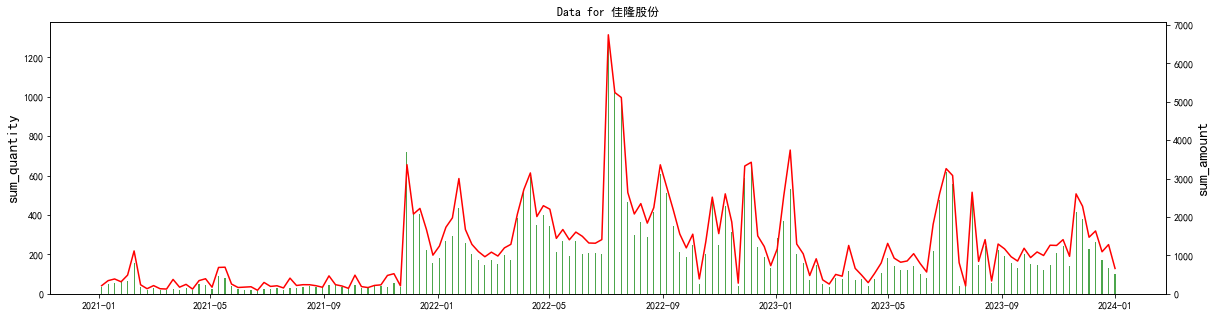

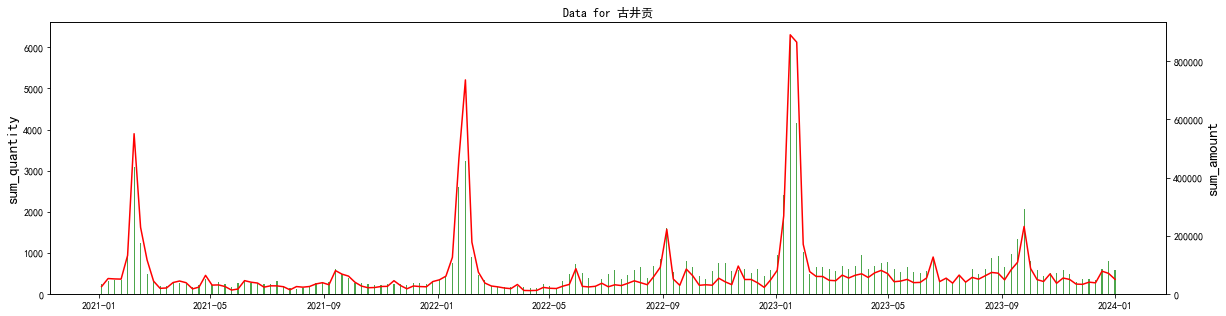

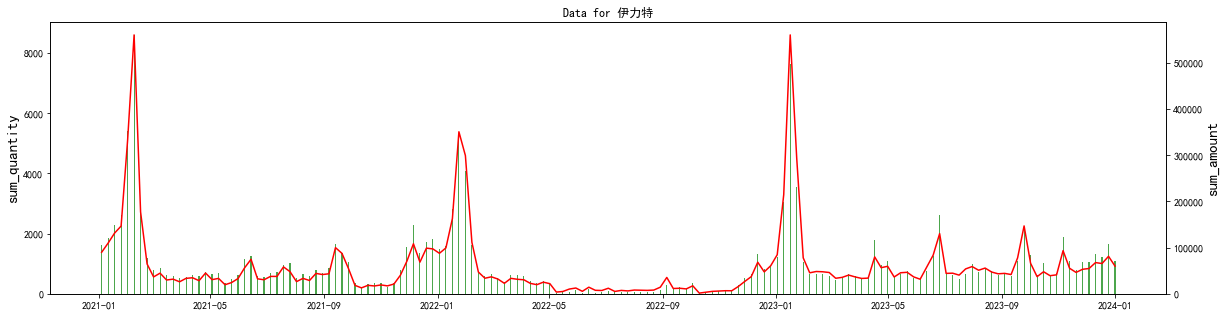

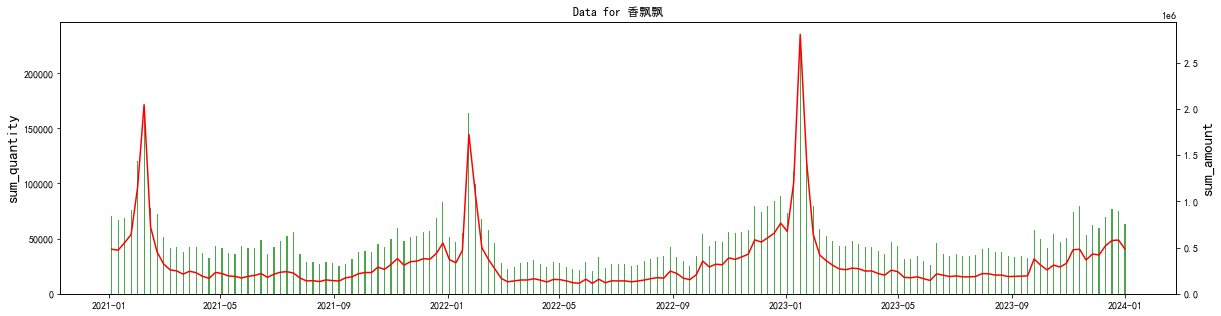

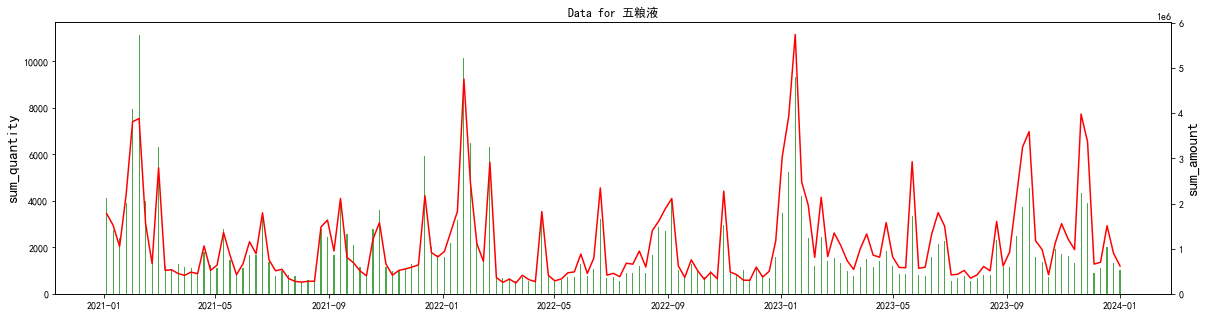

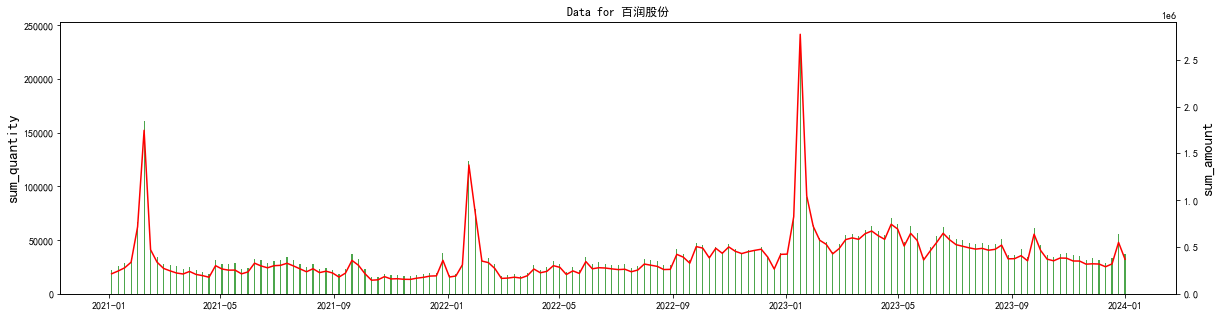

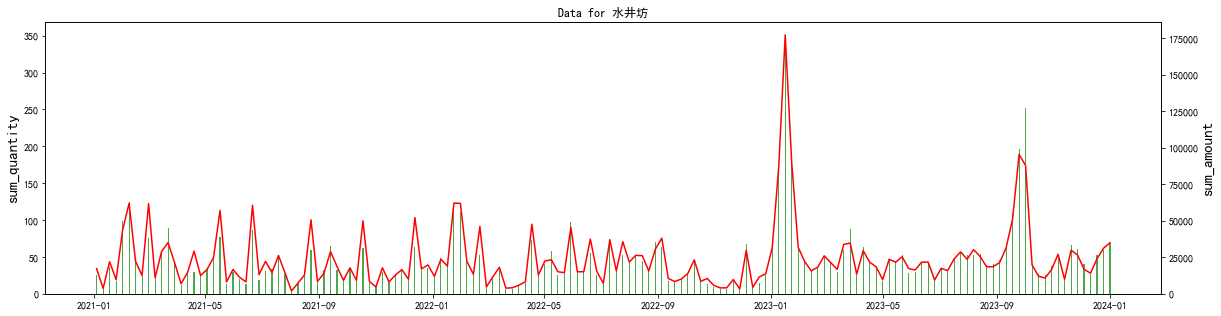

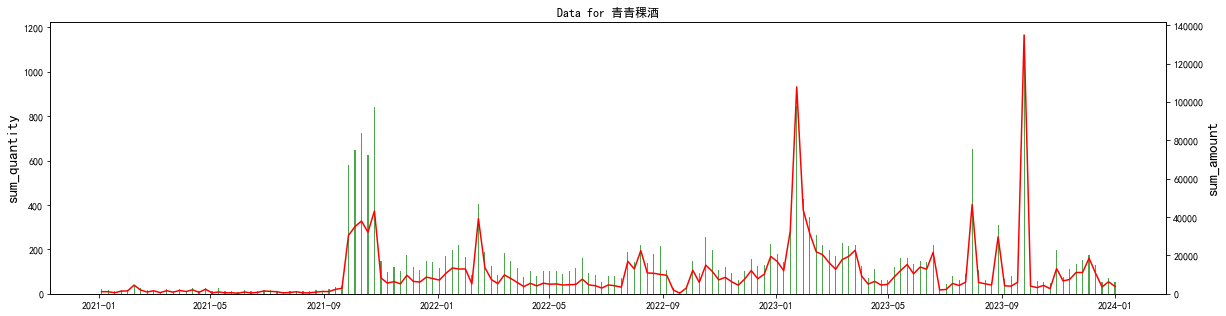

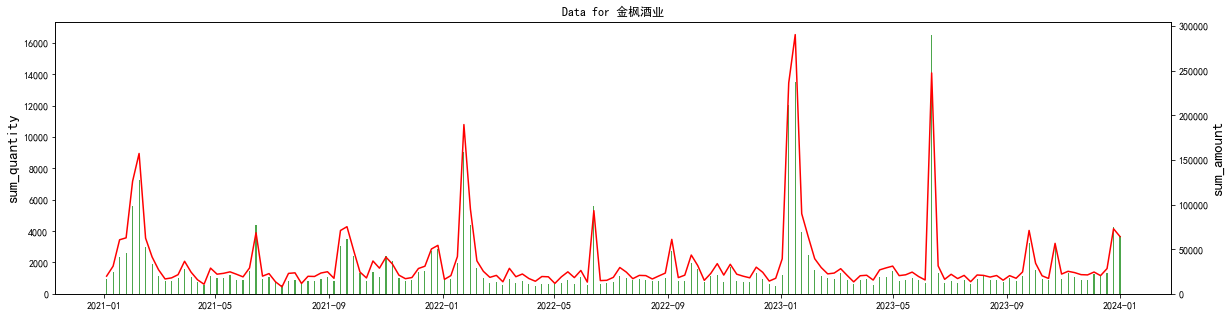

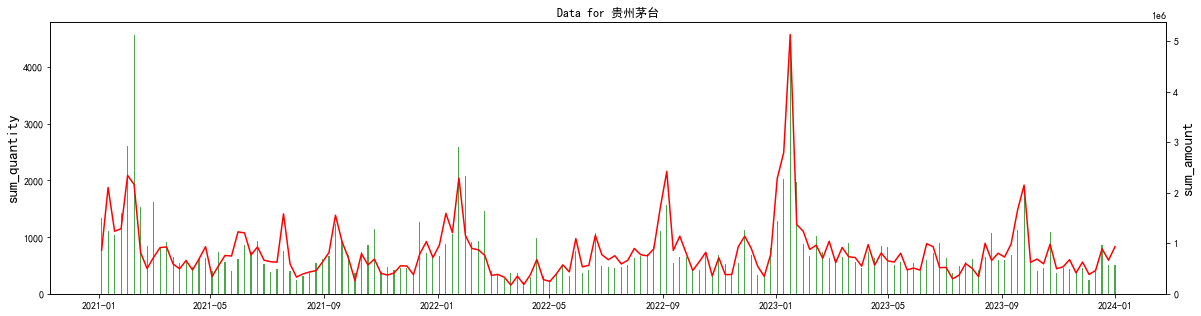

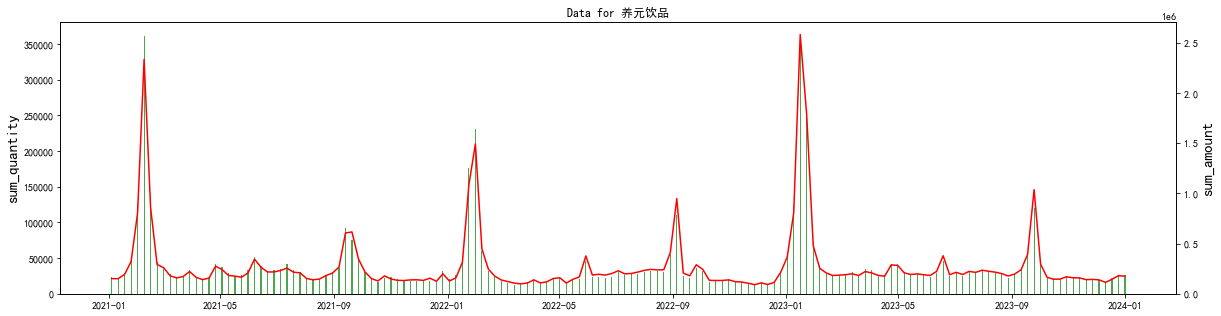

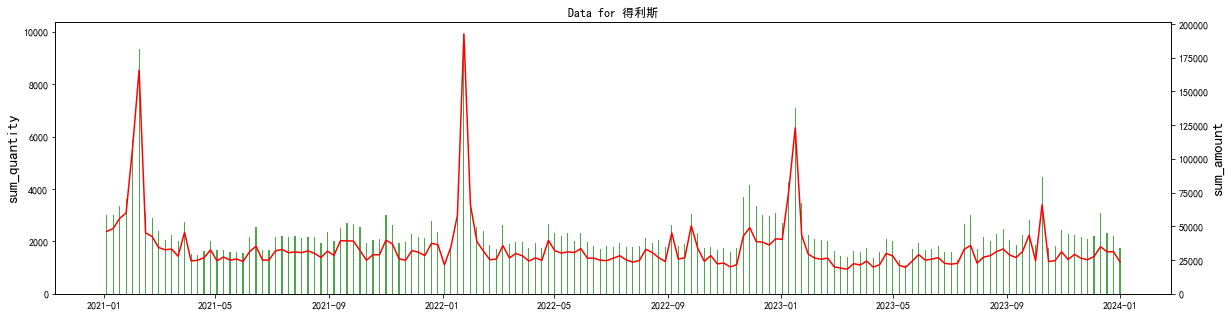

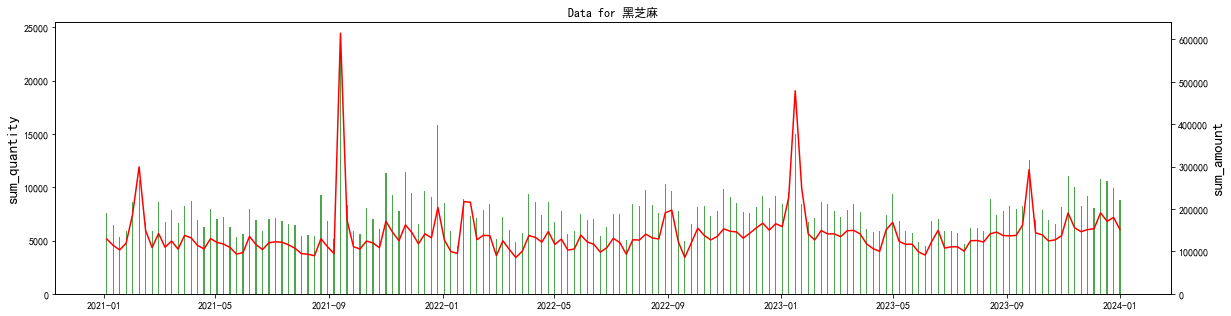

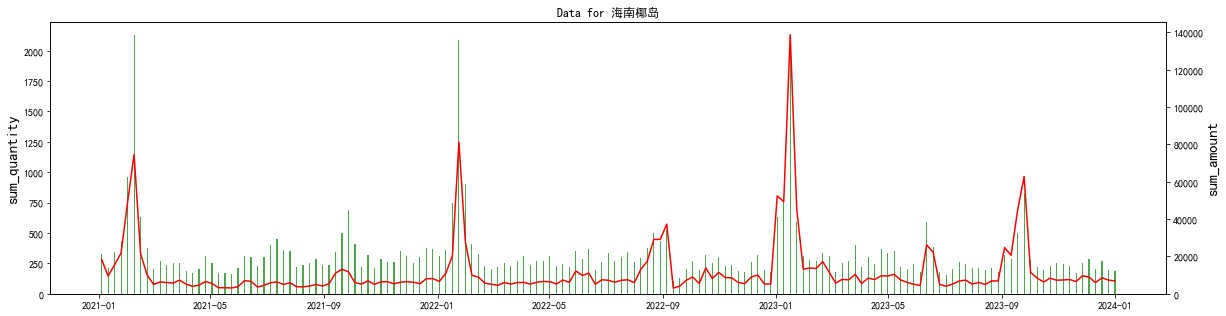

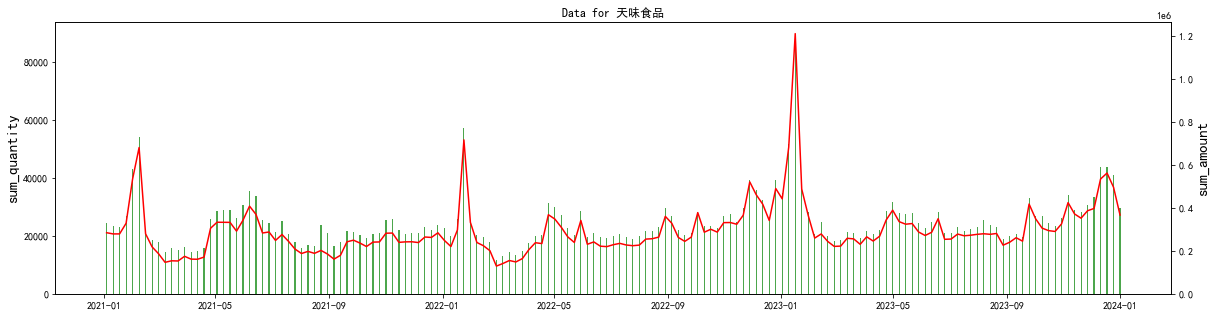

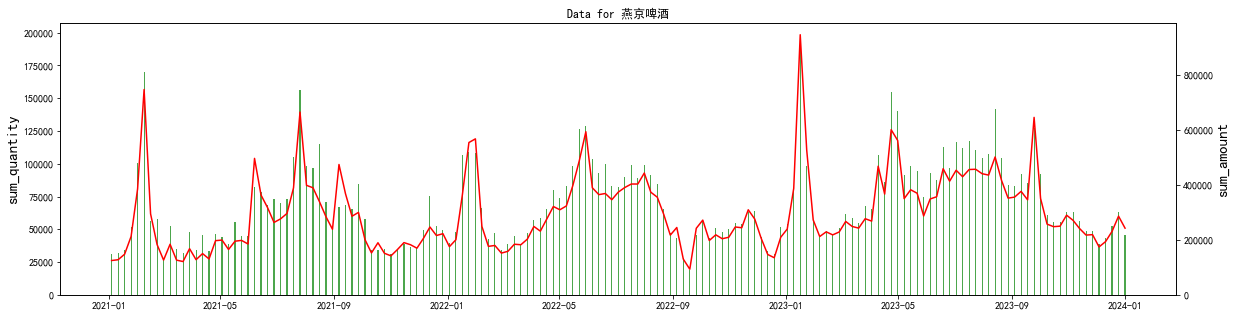

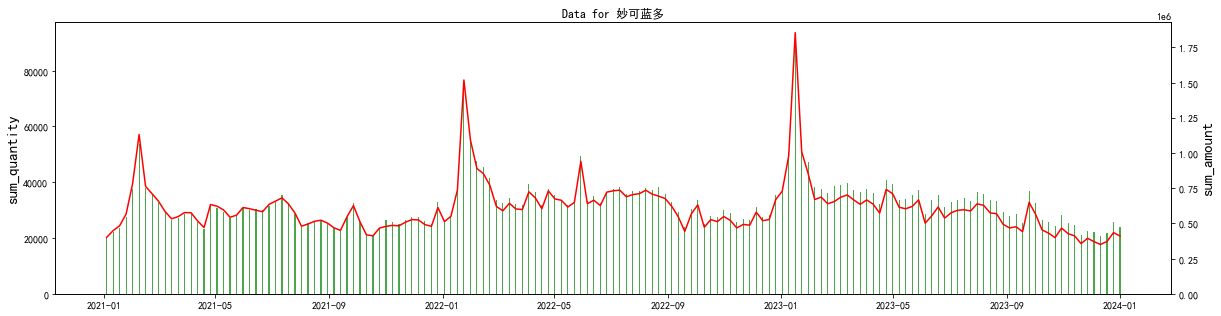

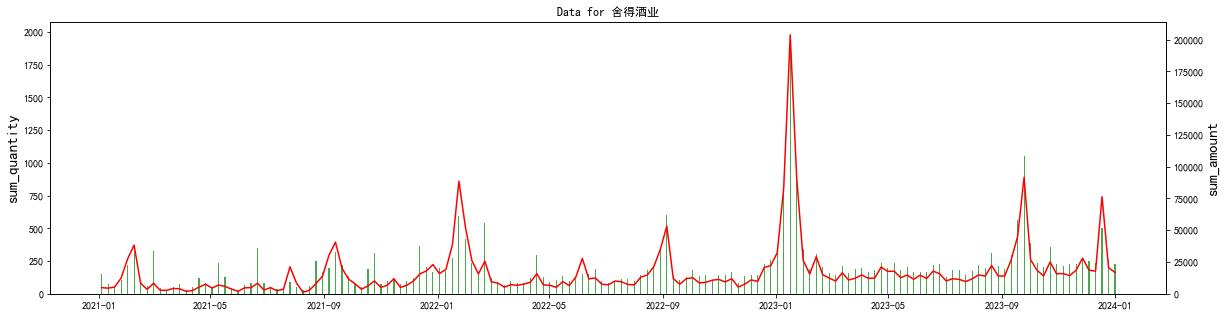

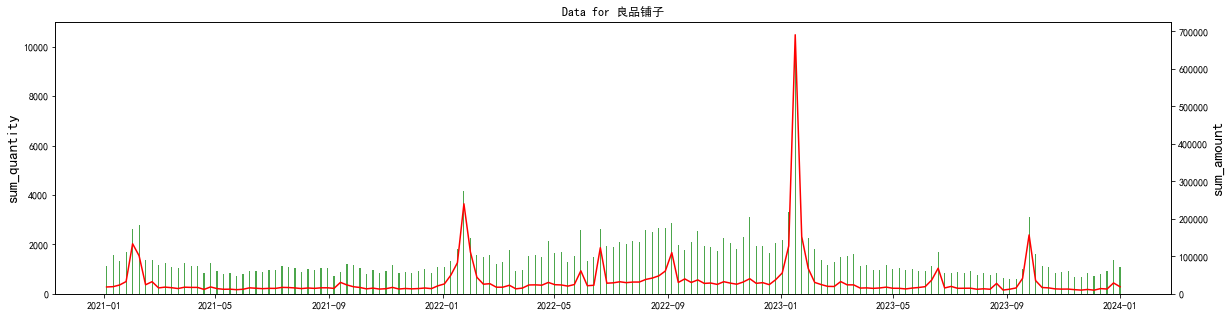

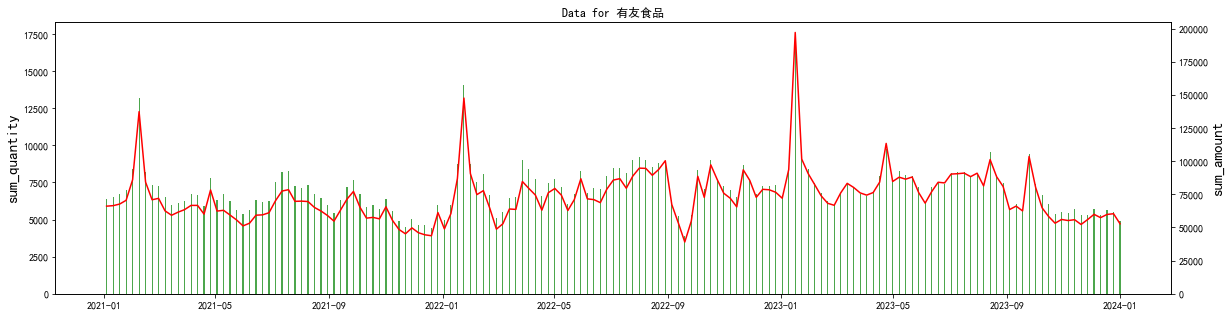

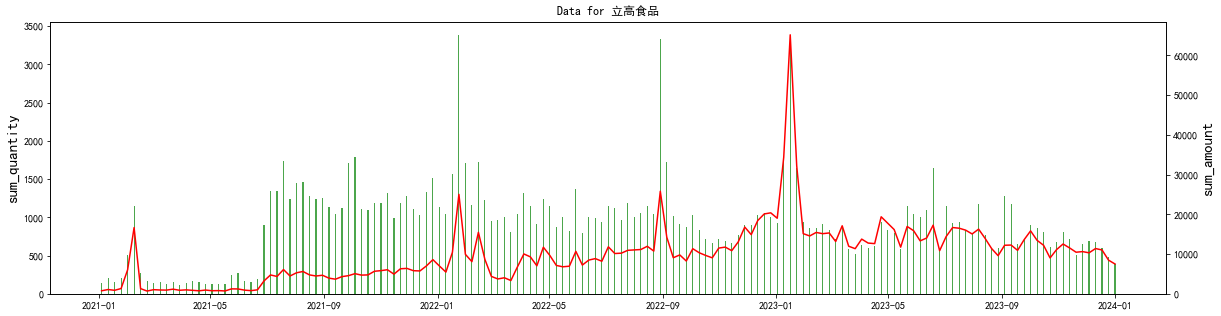

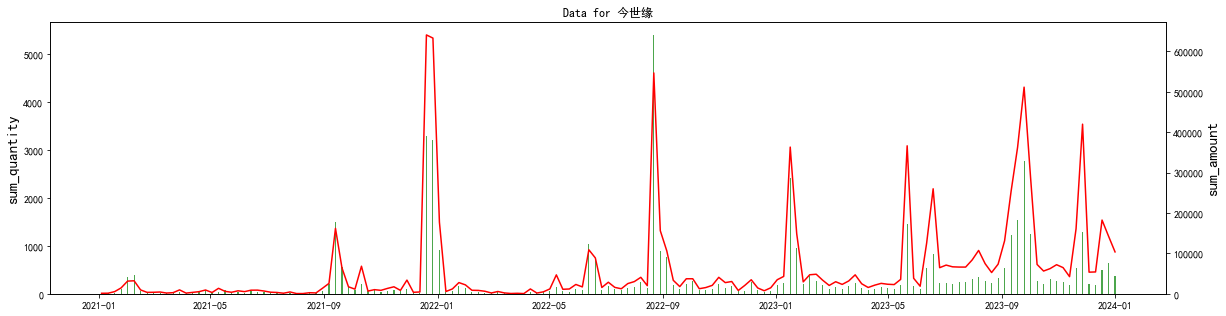

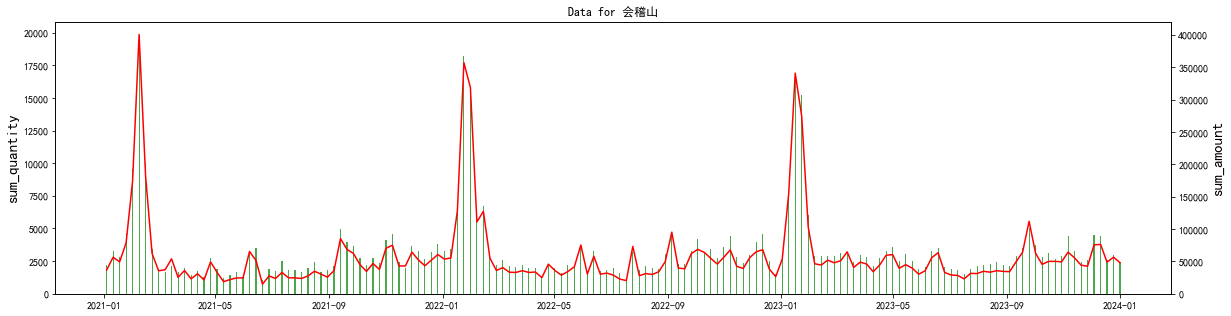

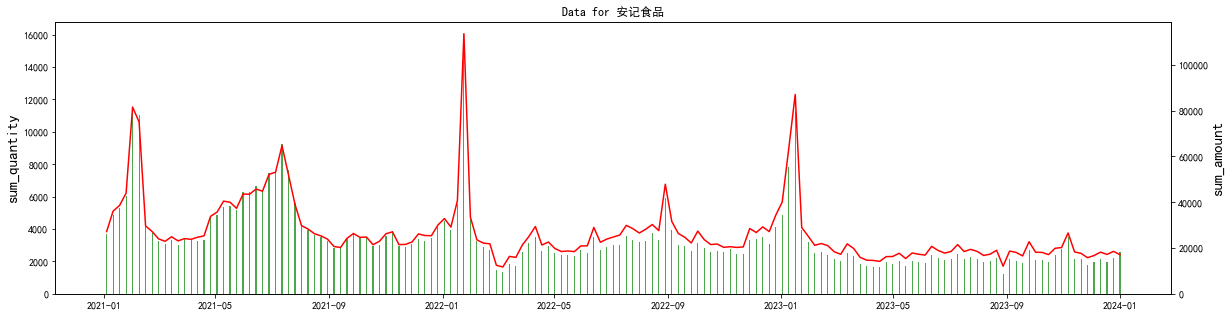

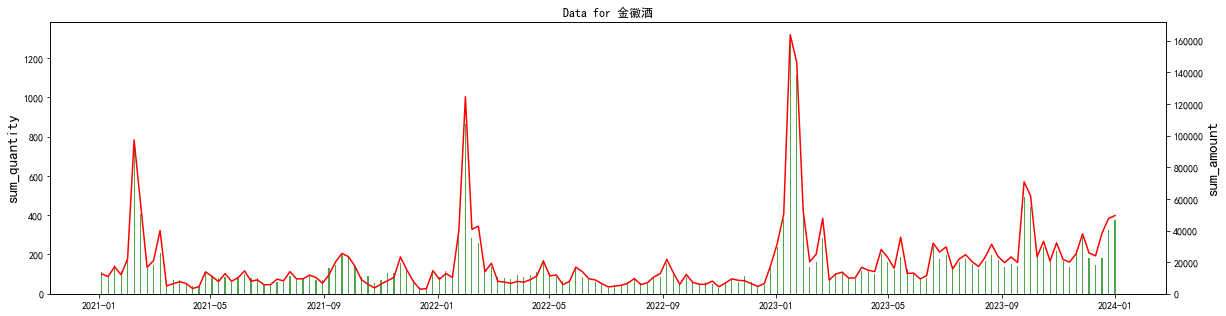

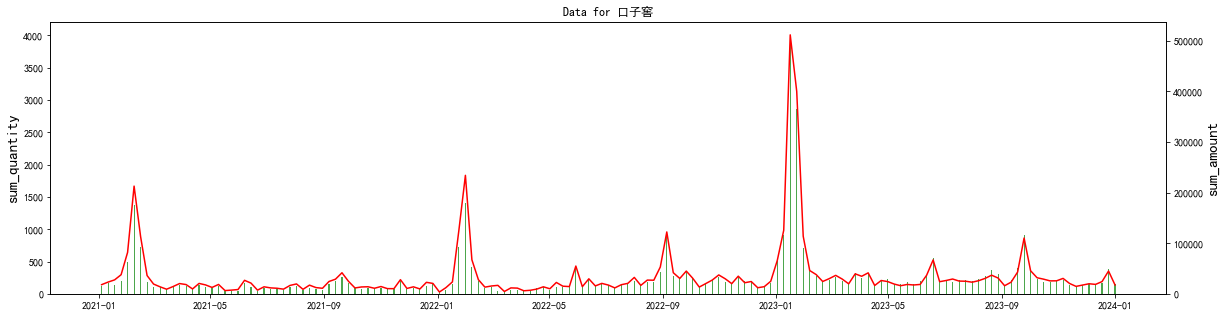

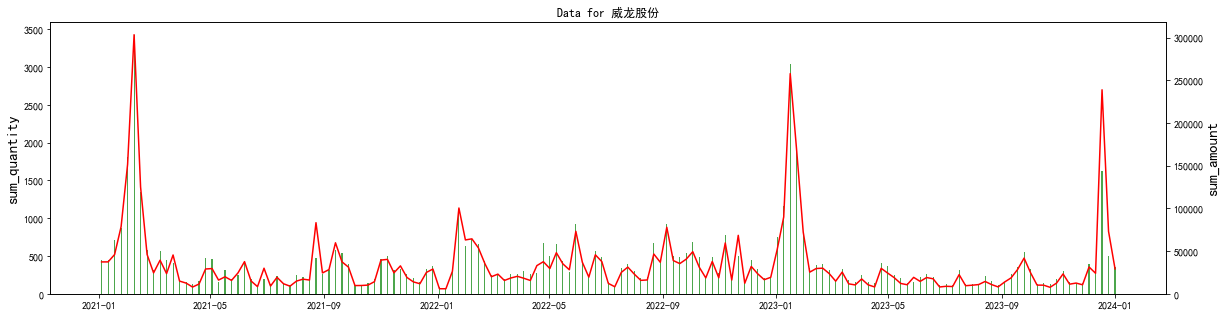

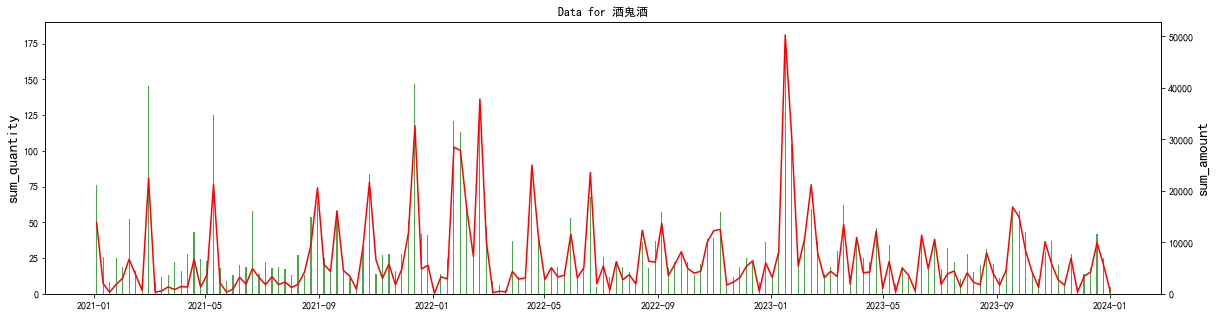

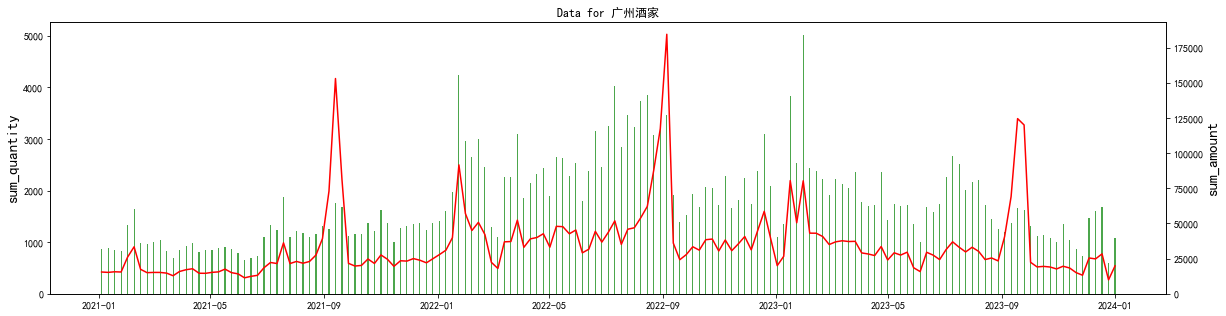

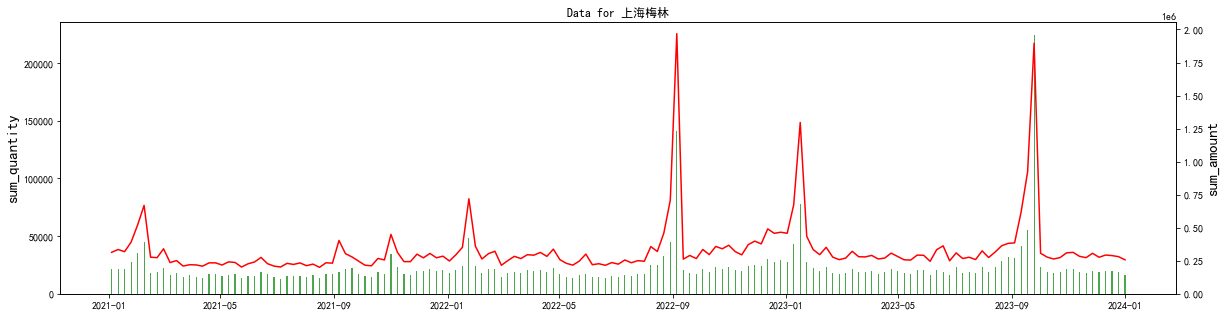

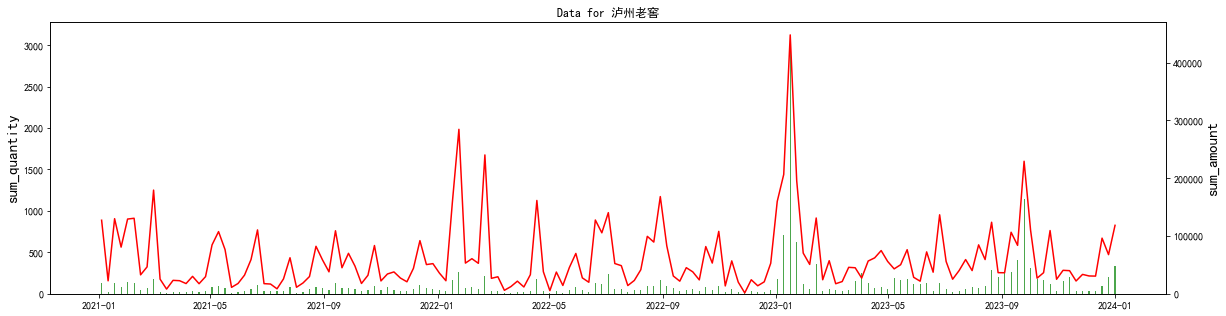

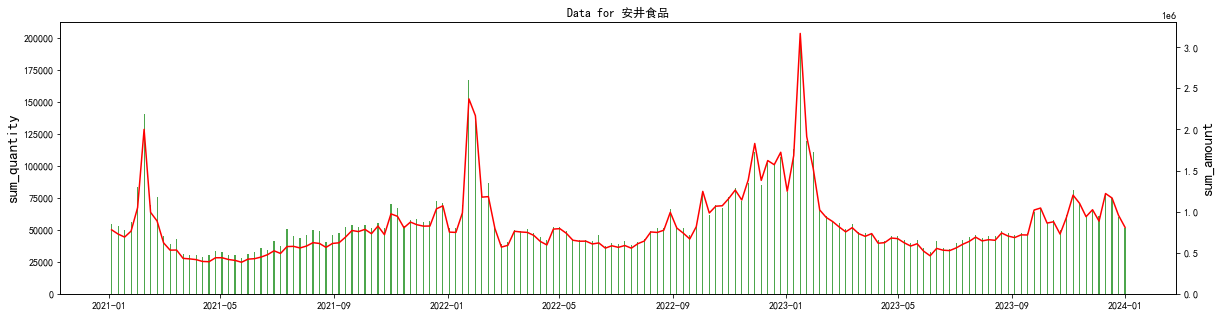

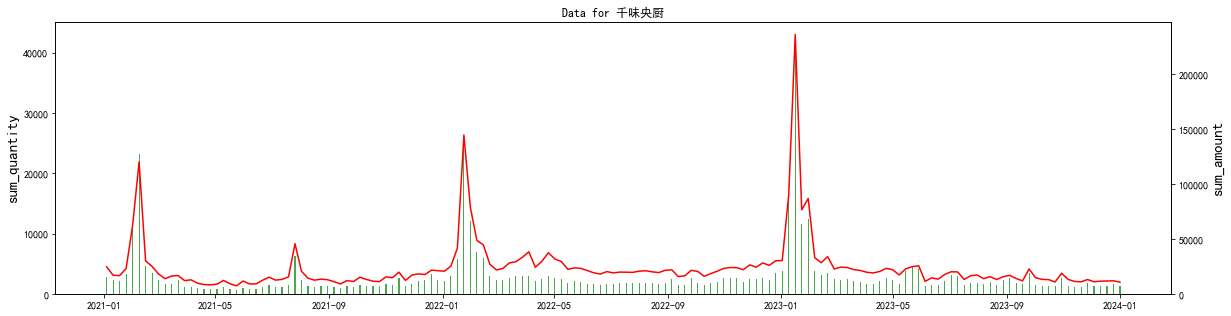

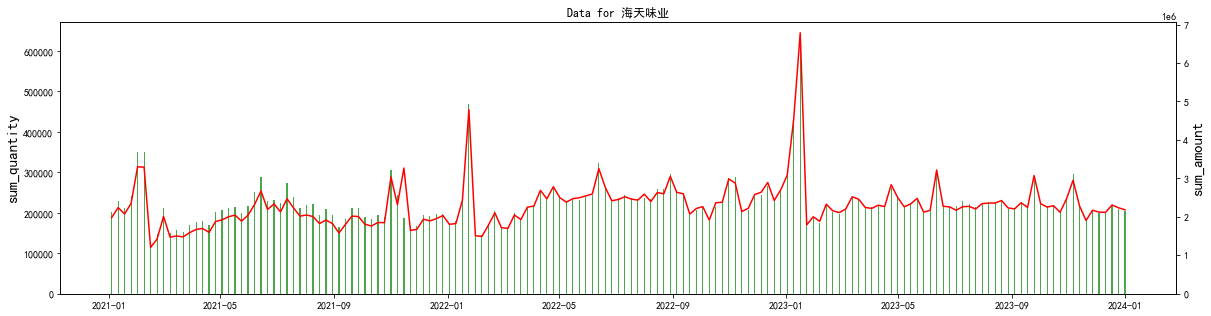

In [22]:
for shortname in common_elements:
    symbol_data = data_final[data_final['shortname'] == shortname]
    plt.rcParams['figure.figsize'] = (20,5)
    fig = plt.figure()
    #画柱形图
    ax1 = fig.add_subplot(111)
    ax1.bar(symbol_data.to_numpy().T[1], symbol_data.to_numpy().T[5],label='sum_quantity',alpha=.7,color='g',width=1.2)
    ax1.set_ylabel('sum_quantity',fontsize='15')
    #ax1.set_title('数据统计',fontsize='20')
    #画折线图
    ax2 = ax1.twinx() #组合图必须加这个
    ax2.plot(symbol_data.to_numpy().T[1], symbol_data.to_numpy().T[4], label='sum_amount',color= 'r')
    ax2.set_ylabel('sum_amount',fontsize='15')
    ax2.set_ylim(bottom=0)
#     plt.subplots_adjust(wspace=0.3) 
    plt.title(f'Data for {shortname}')
    plt.xlabel('week_start_day')
    plt.xticks(rotation=45)
    plt.show()